# **E-Commerce Analysis**

The purpose of this analysis is to yield valuable insights from an e-commerce platform, which would benefit both businesses and consumers in making strategic decisions and optimizations.

The dataset encompasses information concerning men's fashion products available on the e-commerce platform.

This analysis aims to achieve the following objectives:
- Identifying popular product categories and brands.
- Analyzing pricing trends and discount strategies.
- Understanding seller behavior and performance.
- Investigating customer preferences and product satisfaction.
- Exploring correlations among various attributes such as price, rating, and brand.
- Extracting valuable insights from textual data using text analysis techniques, thereby uncovering hidden trends and patterns in product descriptions and details.

In [1294]:
# Import necessary library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [1295]:
# Setting the formatting parameters
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = "{:,.2f}".format

## **Data Wrangling**

*  Transforming raw data into a more usable format for better understanding, decision-making, and analysis.

In [1296]:
df = pd.read_json('fashion_products_dataset.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              30000 non-null  object        
 1   actual_price     30000 non-null  object        
 2   average_rating   30000 non-null  object        
 3   brand            30000 non-null  object        
 4   category         30000 non-null  object        
 5   crawled_at       30000 non-null  datetime64[ns]
 6   description      30000 non-null  object        
 7   discount         30000 non-null  object        
 8   images           30000 non-null  object        
 9   out_of_stock     30000 non-null  bool          
 10  pid              30000 non-null  object        
 11  product_details  30000 non-null  object        
 12  seller           30000 non-null  object        
 13  selling_price    30000 non-null  object        
 14  sub_category     30000 non-null  objec

In [1297]:
df.sample(3)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
18734,f9392fa5-0219-539d-bd18-f4cb59ea5d50,699,4.7,Cots,Clothing and Accessories,2021-02-10 23:39:00,Cotson Organic Cotton and Bamboo Men's Formal ...,53% off,[],False,SOCFGCWWZZWQGVBB,"[{'Color': 'Brown'}, {'Pattern': 'Solid'}, {'I...",EVINCEMARKETERS,325,Clothing Accessories,Men Solid Mid-Calf/Crew (Pack of 5),https://www.flipkart.com/cotson-men-solid-mid-...
16089,c35749b3-bd5e-5f5f-aac5-a1ae18429cc7,"1,200",3.4,TEE BUD,Clothing and Accessories,2021-02-10 23:12:36,Refresh your clothing with the awesome collect...,64% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFFXV2B8VYJGC9,"[{'Type': 'Round Neck'}, {'Sleeve': 'Short Sle...",T-SHIRT EXPRESS,430,Topwear,Printed Men Round Neck Yellow T-Shirt,https://www.flipkart.com/tee-buddy-printed-men...
21383,9193f4f8-4eeb-5584-b8f5-a3db8a4bea5d,699,3.9,Styleska,Clothing and Accessories,2021-02-11 00:04:09,,35% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFZ3GWH9YPA8JV,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",Styleskart,450,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/styleskart-printed-me...


#### **Features:**
* **Title           :** Title of the product.
* **Id              :** Internal ID for the product.
* **actual_price    :** The actual price of the product.
* **average_rating  :** Average rating of the product.
* **brand           :** Brand of the product.
* **category        :** Category to which the product belongs.
* **crawled_at      :** Date and time the product information was collected.
* **description     :** Description of the product.
* **discount        :** Percentage discount applied to the product.
* **images          :** URLs of images associated with the product.
* **out_of_stock    :** Indicates whether the product is out of stock.
* **pid             :** Unique product identifier.
* **product_details :** Additional details about the product.
* **seller          :** Name of the seller offering the product.
* **selling_price   :** Current selling price of the product.
* **sub_category    :** Sub-category to which the product belongs.
* **url             :** URL of the product page.

In [1298]:
df.isnull().sum()

_id                0
actual_price       0
average_rating     0
brand              0
category           0
crawled_at         0
description        0
discount           0
images             0
out_of_stock       0
pid                0
product_details    0
seller             0
selling_price      0
sub_category       0
title              0
url                0
dtype: int64

In [1299]:
# Check for duplicate records
df['_id'].duplicated().sum()

0

In [1300]:
# drop redundant columns
df = df.drop(['_id','crawled_at','images','out_of_stock',
              'url'], axis=1)

In [1301]:
df.shape

(30000, 12)

### **Data Cleaning**

In [1302]:
df.dtypes

actual_price       object
average_rating     object
brand              object
category           object
description        object
discount           object
pid                object
product_details    object
seller             object
selling_price      object
sub_category       object
title              object
dtype: object

#### **Cleaning - Numeric Columns**
* **actual_price** 
* **average_rating**
* **discount**
* **selling_price**

#### **Data Cleaning - actual_price**

In [1303]:
df['actual_price'].dtypes

dtype('O')

In [1304]:
df['actual_price'].nunique()

729

In [1305]:
df['actual_price'].sample(5)

27842    2,999
8167       950
27405    2,499
24963    1,799
26815      799
Name: actual_price, dtype: object

In [1306]:
sorted(df['actual_price'].unique())[:10]

['',
 '1,000',
 '1,001',
 '1,002',
 '1,004',
 '1,014',
 '1,015',
 '1,020',
 '1,028',
 '1,029']

In [1307]:
# Remove commas from the 'actual_price' column, if present
df['actual_price'] = df['actual_price'].str.replace(',', '')

# Replace empty strings with NaN in the 'actual_price' column
df['actual_price'] = df['actual_price'].replace('', np.nan)


In [1308]:
# Convert the 'actual_price' column to float datatype
df['actual_price'] = df['actual_price'].astype(float)

In [1309]:
df['actual_price'].dtypes

dtype('float64')

#### **Data Cleaning -average_rating**

In [1310]:
sorted(df['average_rating'].unique())[:10]

['', '1', '1.3', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1']

In [1311]:
df = df.replace('',np.NaN)

In [1312]:
df['average_rating'] = df['average_rating'].astype(float)

In [1313]:
sorted(df['average_rating'].unique())

[1.0,
 1.3,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.7,
 nan,
 4.6,
 4.8,
 4.9,
 5.0]

In [1314]:
(df.isnull().sum()/len(df))*100, df.isnull().sum()

(actual_price       2.88
 average_rating     8.15
 brand              6.89
 category           0.00
 description       39.93
 discount           3.14
 pid                0.00
 product_details    0.00
 seller             5.80
 selling_price      0.01
 sub_category       0.00
 title              0.00
 dtype: float64,
 actual_price         863
 average_rating      2446
 brand               2068
 category               0
 description        11980
 discount             941
 pid                    0
 product_details        0
 seller              1741
 selling_price          2
 sub_category           0
 title                  0
 dtype: int64)

#### **Data Cleaning -selling_price**

In [1315]:
df['selling_price'].dtypes

dtype('O')

In [1316]:
df['selling_price'].value_counts(dropna=False).sort_values(ascending=False)

selling_price
399      1571
299      1330
499      1328
699      1001
799       810
         ... 
181         1
901         1
3,439       1
537         1
697         1
Name: count, Length: 1513, dtype: int64

In [1317]:
df['selling_price'].unique()[:20]

array(['921', '499', '931', '911', '943', '1,169', '466', '545', '489',
       '531', '1,074', '1,042', '1,043', '1,046', '1,044', '1,039', '521',
       '511', '1,067', '491'], dtype=object)

In [1318]:
df['selling_price'] = df['selling_price'].str.strip()
df['selling_price'] = df['selling_price'].str.replace(',','')


In [1319]:
df['selling_price'] = df['selling_price'].astype(float)

In [1320]:
df[df['selling_price'].isnull()]

,actual_price,average_rating,brand,category,description,discount,pid,product_details,seller,selling_price,sub_category,title
20739,NaN,NaN,FOOT F,Clothing and Accessories,This is a special product from the house of FO...,NaN,SOCFYNKS7XZ3YUKZ,"[{'Color': 'Multicolor'}, {'Pattern': 'Printed...",NaN,NaN,Clothing Accessories,Men Printed Calf Length (Pack of 5)
29488,NaN,NaN,Ravil,Clothing and Accessories,NaN,NaN,TKPFZAGJYK9YGRAA,"[{'Style Code': 'Broad-line'}, {'Closure': 'Dr...",NaN,NaN,Bottomwear,Striped Men Black Track Pants


#### **Data Cleaning -discount**

In [1321]:
df['discount'].sample(5)

18294    62% off
936      57% off
23475    51% off
8631     70% off
16633    55% off
Name: discount, dtype: object

In [1322]:
df.at[1,'discount'].replace('% off', '')

'66'

In [1323]:
for i in range(len(df)):
    try:
        df.at[i,'discount'] = df.at[i,'discount'].replace('% off', '')
    except:
        np.NaN

df['discount'].sample(5)

27579    20
29874    44
29997    40
7781     39
22710    43
Name: discount, dtype: object

In [1324]:
df['discount'] = df['discount'].astype(float)

In [1325]:
sorted(df['discount'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 nan]

In [1326]:
df.describe()

,actual_price,average_rating,discount,selling_price
count,"29,137.00","27,554.00","29,059.00","29,998.00"
mean,"1,472.62",3.64,50.34,716.56
std,963.26,0.66,16.82,572.44
min,150.00,1.00,1.00,99.00
25%,865.00,3.30,40.00,398.00
50%,"1,249.00",3.80,53.00,549.00
75%,"1,799.00",4.10,63.00,829.00
max,"12,999.00",5.00,87.00,"7,999.00"


In [1327]:
df.columns

Index(['actual_price', 'average_rating', 'brand', 'category', 'description',
       'discount', 'pid', 'product_details', 'seller', 'selling_price',
       'sub_category', 'title'],
      dtype='object')

#### **Data Cleaning - Categorical Columns**
* **brand** 
* **category**
* **pid**
* **product_details**
* **seller**
* **title**

#### **Data Cleaning - brand & pid**

In [1328]:
df['brand'].value_counts(dropna=False)

brand
NaN                        2068
ARBO                        999
Pu                          996
True Bl                     996
REEB                        996
ECKO Unl                    993
Free Authori                864
Keo                         668
Amp                         621
Black Beat                  560
PixF                        528
yellowvib                   507
vims rai                    504
Marca Disa                  444
Oka                         419
Gracew                      405
TEE BUD                     398
Shoef                       358
V                           346
CupidSto                    338
Urban D                     324
Xi                          319
AXMA                        318
ATHL                        303
FLEXIM                      301
Dudli                       293
TOM BU                      291
Cots                        291
T10 Spor                    285
Lev                         279
Breakboun                   273
Me

In [1329]:
df['pid'].value_counts(dropna=False)

pid
SHOFW9HYGJUYX7TG    25
TSHFYRF8MQRAZYXJ    25
SWSFVEV2R8JPZ9GH    25
TSHFVNG7HUF3FQEP    25
TSHFZZ2WHKH4EGKZ    25
                    ..
TSHFGGYPVN6PMSDM     1
TSHFGD9KHEW2AYVZ     1
TSHFGGYU9AMFSW3J     1
TSHFGH3CFYWGHWNA     1
JCKFWTPCWNQSFAH3     1
Name: count, Length: 28080, dtype: int64

In [1330]:
df[df['brand'].isnull()]

,actual_price,average_rating,brand,category,description,discount,pid,product_details,seller,selling_price,sub_category,title
35,"2,469.00",4.30,NaN,Clothing and Accessories,"Provides you nu-Lite men Necktie, Pocket Squar...",79.00,CTPFVZTEMJWEJJJV,[{'Model Name': 'Men's Silk Necktie Set with P...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Red)
36,"2,469.00",2.70,NaN,Clothing and Accessories,NaN,79.00,CTPFVQP2PEHKGYFQ,[{'Model Name': 'Men's Plain Micro Polyester N...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Red)
37,"1,299.00",4.70,NaN,Clothing and Accessories,NaN,73.00,CTPFVPM3NDPBPPXE,[{'Model Name': 'Men's Micro Polyester Necktie...,NextEdgeRetails,349.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Purple)
38,"2,599.00",4.30,NaN,Clothing and Accessories,We NextEdgeRetails are a professional tie manu...,80.00,CTPFVZHSA7G4PFC5,[{'Model Name': 'Men's Micro Polyester Checker...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Grey)
39,"2,469.00",2.70,NaN,Clothing and Accessories,We NextEdgeRetails are a professional tie manu...,79.00,CTPFVZD8CNSZ3AMR,[{'Model Name': 'Men's Micro Polyester Printed...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Multicolor)
...,...,...,...,...,...,...,...,...,...,...,...,...
29575,"1,299.00",4.00,NaN,Clothing and Accessories,Pure Pashmina Wool Kingri Hand Embroidery Ligh...,65.00,SWLFHWSHRFPZG5ZF,[{'Style Code': 'Pure Pashmina Wool Kingri Han...,K J TRADERS,449.00,Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (Brown)"
29576,999.00,2.30,NaN,Clothing and Accessories,Pure Pashmina Wool Kingri Hand Embroidery Ligh...,60.00,SWLFHZ3AZJRVGXYT,[{'Style Code': 'Pure Pashmina Wool Kingri Han...,K J TRADERS,399.00,Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (White)"
29578,"1,999.00",4.00,NaN,Clothing and Accessories,PURE WOOLEN KASHMIRI SHAWL LIGHT BROWN XXL SIZE,40.00,SWLFGT9FVVHR5CNH,[{'Style Code': 'PURE WOOLEN KASHMIRI SHAWL LI...,K J TRADERS,"1,199.00",Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (Brown)"
29579,"1,999.00",2.80,NaN,Clothing and Accessories,WOOLEN LOHI SET OF 2 COMBO WHITE AND BEIGE,35.00,SWLFGR3HE5SZZH3M,[{'Style Code': 'WOOLEN LOHI SET OF 2 COMBO WH...,K J TRADERS,"1,299.00",Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (Whit..."


In [1331]:
df[df['pid'] == 'WSCFYJN8S9WQZGZA']

,actual_price,average_rating,brand,category,description,discount,pid,product_details,seller,selling_price,sub_category,title
3427,"2,199.00",4.50,Zack Fo,Clothing and Accessories,NaN,55.00,WSCFYJN8S9WQZGZA,"[{'Pattern': 'Solid'}, {'Ideal For': 'Men'}, {...",KrishnamEnterprisaes,974.00,"Blazers, Waistcoats and Suits",Solid Men Waistcoat
3479,"2,199.00",4.50,Zack Fo,Clothing and Accessories,NaN,55.00,WSCFYJN8S9WQZGZA,"[{'Pattern': 'Solid'}, {'Ideal For': 'Men'}, {...",KrishnamEnterprisaes,974.00,"Blazers, Waistcoats and Suits",Solid Men Waistcoat
3519,"2,199.00",4.50,Zack Fo,Clothing and Accessories,NaN,55.00,WSCFYJN8S9WQZGZA,"[{'Pattern': 'Solid'}, {'Ideal For': 'Men'}, {...",KrishnamEnterprisaes,974.00,"Blazers, Waistcoats and Suits",Solid Men Waistcoat
3559,"2,199.00",4.50,Zack Fo,Clothing and Accessories,NaN,55.00,WSCFYJN8S9WQZGZA,"[{'Pattern': 'Solid'}, {'Ideal For': 'Men'}, {...",KrishnamEnterprisaes,974.00,"Blazers, Waistcoats and Suits",Solid Men Waistcoat


In [1332]:
df['pid'].nunique()

28080

In [1333]:
df.duplicated(subset=['pid','seller']).sum()

1915

In [1334]:
df.loc[df.duplicated(subset=['pid']), 
       ['brand','pid','seller']].sort_values(by='pid')

,brand,pid,seller
8971,V,BRFFMUKDFETTC4YC,SIDDHI AGENCIES
29523,Bumm,BRFFWVHFKXCNNFGZ,Bummer(Not Enough Ratin
16791,Urban D,BXRFWQ34ZDKZHCG3,VRS FASHIONS PVT LTD
16793,Urban D,BXRFWQ3FZUBZG7TF,VRS FASHIONS PVT LTD
16792,Urban D,BXRFWYAXMFDHGPQG,VRS FASHIONS PVT LTD
...,...,...,...
3565,Zack Fo,WSCFWVPXG9PBTSFW,KrishnamEnterprisaes
3525,Zack Fo,WSCFWVPXG9PBTSFW,KrishnamEnterprisaes
3559,Zack Fo,WSCFYJN8S9WQZGZA,KrishnamEnterprisaes
3479,Zack Fo,WSCFYJN8S9WQZGZA,KrishnamEnterprisaes


In [1335]:
df.drop_duplicates(subset=['brand','pid','seller'], keep='last',inplace=True)

In [1336]:
df = df.reset_index(drop=True)

In [1337]:
df.shape

(28086, 12)

In [1338]:
df['pid'].value_counts(dropna=False)

pid
SWSFJY5ZWGJPE59Z    2
CTPEFTS6CVZKEMSZ    2
BRFFMUKDFETTC4YC    2
TSHFWVYDD2G5USN6    2
JCKFWPYHTEZK4BYG    2
                   ..
TSHFGZMQNGMFBTZV    1
TSHFGD9JMH3ZVWC7    1
TSHFGGYCHR9ZZHJ3    1
TSHFGZGRRZXCCYSK    1
JCKFWTPCWNQSFAH3    1
Name: count, Length: 28080, dtype: int64

In [1339]:
pid_duplicate = df.loc[df.duplicated(subset=['pid']), 'pid'].tolist()
df[df['pid'].isin(pid_duplicate)]

,actual_price,average_rating,brand,category,description,discount,pid,product_details,seller,selling_price,sub_category,title
1685,"2,599.00",4.00,REEB,Clothing and Accessories,REEBOK FND HOODY,40.00,SWSFJY5ZWGJPE59Z,"[{'Color': 'Grey'}, {'Fabric': 'Polyester Blen...",adi Sports India Pvt Ltd2.6Seller changed. Che...,"2,599.00",Winter Wear,Full Sleeve Solid Men Sweatshirt
1885,NaN,4.00,REEB,Clothing and Accessories,REEBOK FND HOODY,NaN,SWSFJY5ZWGJPE59Z,"[{'Color': 'Grey'}, {'Fabric': 'Polyester Blen...",adi Sports India Pvt Ltd,"2,599.00",Winter Wear,Full Sleeve Solid Men Sweatshirt
2650,999.00,NaN,NaN,Clothing and Accessories,Cufflinks Set A Man Apart. You Just Feel Bette...,80.00,CTPEFTS6CVZKEMSZ,[{'Model Name': 'GOLDEN HEXAGON CUFFLINK GIFT ...,NaN,199.00,Clothing Accessories,Tripin Brass Cufflink & Tie Pin Set (Gold)
2653,999.00,3.60,NaN,Clothing and Accessories,Cufflinks Set A Man Apart. You Just Feel Bette...,80.00,CTPEFTS6CVZKEMSZ,[{'Model Name': 'GOLDEN HEXAGON CUFFLINK GIFT ...,TRIPIN,199.00,Clothing Accessories,Tripin Brass Cufflink & Tie Pin Set (Gold)
8316,660.00,4.10,V,Clothing and Accessories,All day comfort and support from work to play ...,10.00,BRFFMUKDFETTC4YC,"[{'Color': 'Multicolor'}, {'Fabric': 'Pure Cot...",Btfashion,590.00,Innerwear and Swimwear,Men Brief (Pack of 6)
8505,628.00,4.10,V,Clothing and Accessories,All day comfort and support from work to play ...,18.00,BRFFMUKDFETTC4YC,"[{'Color': 'Multicolor'}, {'Fabric': 'Pure Cot...",SIDDHI AGENCIES,514.00,Innerwear and Swimwear,Men Brief (Pack of 6)
10241,"3,299.00",3.60,True Bl,Clothing and Accessories,NaN,60.00,JEAFESNDY7XNYQF3,"[{'Style Code': '20318901'}, {'Ideal For': 'Me...",KAPSONSRETAILPVTLTD,"1,319.00",Bottomwear,Slim Men Grey Jeans
10998,"3,299.00",2.60,True Bl,Clothing and Accessories,NaN,60.00,JEAFESNDY7XNYQF3,"[{'Style Code': '20318901'}, {'Ideal For': 'Me...",ArvindTrueBlue,"1,319.00",Bottomwear,Slim Men Grey Jeans
17230,999.00,4.50,NaN,Clothing and Accessories,Refresh your clothing with the awesome collect...,62.00,TSHFWVYDD2G5USN6,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",ONEIRO CONCEPTS,378.00,Topwear,Oneiro Solid Men Polo Neck Maroon T-Shirt
17231,999.00,4.50,Onei,Clothing and Accessories,Refresh your clothing with the awesome collect...,62.00,TSHFWVYDD2G5USN6,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",ONEIRO CONCEPTS,378.00,Topwear,Solid Men Polo Neck Maroon T-Shirt


In [1340]:
df.iloc[1885]

actual_price                                                     NaN
average_rating                                                  4.00
brand                                                           REEB
category                                    Clothing and Accessories
description                                         REEBOK FND HOODY
discount                                                         NaN
pid                                                 SWSFJY5ZWGJPE59Z
product_details    [{'Color': 'Grey'}, {'Fabric': 'Polyester Blen...
seller                                      adi Sports India Pvt Ltd
selling_price                                               2,599.00
sub_category                                             Winter Wear
title                               Full Sleeve Solid Men Sweatshirt
Name: 1885, dtype: object

In [1341]:
drop_list = [1885,2650,20883]
df.drop(index=drop_list, axis=0, inplace=True)

In [1342]:
df = df.reset_index(drop=True)

In [1343]:
df.groupby(['brand'])['pid'].value_counts()

brand              pid             
A                  SHTEZFGPCGDWS867    1
                   SHTEZFGPFGJFYAEB    1
                   SHTEZFGQDDWQZ8EB    1
                   SHTEZFGQYXFZSHUJ    1
                   SHTEZFGRAMZGHWRV    1
                                      ..
yellowvib          TSHFZZEW4RZHUKFB    1
                   TSHFZZYYFXV9YZWM    1
                   TSHFZZYYWNYYM9WW    1
your shopping sto  SOCFFGA2FYZQBFXT    1
                   SOCFFHFVZGTTDR9C    1
Name: count, Length: 26070, dtype: int64

In [1344]:
df[(df['seller'].isnull()) & df['brand'].isnull()].head()

,actual_price,average_rating,brand,category,description,discount,pid,product_details,seller,selling_price,sub_category,title
58,"1,539.00",NaN,NaN,Clothing and Accessories,NaN,67.00,CTPFVPZDEQYYBKCT,[{'Model Name': 'Men's Micro Polyester Floral ...,NaN,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Multicolor)
63,"2,469.00",4.00,NaN,Clothing and Accessories,NaN,79.00,CTPFVZNX3KKES9DH,[{'Model Name': 'Formal/Casual Silk Necktie Se...,NaN,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Red)
94,"1,539.00",4.30,NaN,Clothing and Accessories,We NextEdgeRetails are a professional tie manu...,77.00,CTPFVPKKWBZUCH7Y,[{'Model Name': 'Men's Micro Polyester Floral ...,NaN,349.00,Clothing Accessories,nu-Lite Satin Tie Pin Set (Green)
137,"1,539.00",NaN,NaN,Clothing and Accessories,We are a professional tie manufacturer. We foc...,77.00,CTPFVPGH5AGD8PZX,[{'Model Name': 'Men's Micro Polyester Floral ...,NaN,349.00,Clothing Accessories,nu-Lite Satin Tie Pin Set (Black)
331,799.00,4.30,NaN,Clothing and Accessories,The world is boring without a little twist and...,69.00,VESFKYJQ3H8PN4QM,"[{'Neck': 'Round Neck'}, {'Pattern': 'Printed'...",NaN,242.00,Innerwear and Swimwear,SayItLoud Men Vest


In [1345]:
df[df['brand'].isnull()]['pid'].value_counts()

pid
CTPFVZTEMJWEJJJV    1
VESFS4VYKEKGVGZB    1
VESFN9F3AUVYRW3H    1
VESFN5RU2NFXRFSH    1
VESFN9F3YGVZSHUH    1
                   ..
DHTFYZDRM4DYPWDV    1
DHTFZMFFNMNZEVKX    1
DHTFZMFFXHHZWVZW    1
DHTFZMFFZNH2NVYF    1
SWLFGR39GM7C3FUZ    1
Name: count, Length: 2010, dtype: int64

In [1346]:
brand_counts = df.groupby('pid')['brand'].value_counts()
brand_counts

pid               brand    
4hWtdShnw%3D%3D   Crocks Cl    1
BDAFSFMYKJDGSXUG  ProUrb       1
BDAFT7NGPTHYGVRJ  ProUrb       1
BDAFT8JHVBQ6ZT3F  Dex          1
BDAFT8JQFNVHGBVH  Dex          1
                              ..
WSCFYHWQ33TC9VDA  Zack Fo      1
WSCFYJN8JGHKKHAF  Zack Fo      1
WSCFYJN8S9WQZGZA  Zack Fo      1
WSCFYM24QSPPSNRT  Zack Fo      1
WSCFZREZCGWKWGJX  True Bl      1
Name: count, Length: 26070, dtype: int64

In [1347]:
df[(df['pid'].isnull()) | df['brand'].isnull()]

,actual_price,average_rating,brand,category,description,discount,pid,product_details,seller,selling_price,sub_category,title
35,"2,469.00",4.30,NaN,Clothing and Accessories,"Provides you nu-Lite men Necktie, Pocket Squar...",79.00,CTPFVZTEMJWEJJJV,[{'Model Name': 'Men's Silk Necktie Set with P...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Red)
36,"2,469.00",2.70,NaN,Clothing and Accessories,NaN,79.00,CTPFVQP2PEHKGYFQ,[{'Model Name': 'Men's Plain Micro Polyester N...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Red)
37,"1,299.00",4.70,NaN,Clothing and Accessories,NaN,73.00,CTPFVPM3NDPBPPXE,[{'Model Name': 'Men's Micro Polyester Necktie...,NextEdgeRetails,349.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Purple)
38,"2,599.00",4.30,NaN,Clothing and Accessories,We NextEdgeRetails are a professional tie manu...,80.00,CTPFVZHSA7G4PFC5,[{'Model Name': 'Men's Micro Polyester Checker...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Grey)
39,"2,469.00",2.70,NaN,Clothing and Accessories,We NextEdgeRetails are a professional tie manu...,79.00,CTPFVZD8CNSZ3AMR,[{'Model Name': 'Men's Micro Polyester Printed...,NextEdgeRetails,499.00,Clothing Accessories,nu-Lite Satin Tie & Cufflink (Multicolor)
...,...,...,...,...,...,...,...,...,...,...,...,...
27663,"1,299.00",4.00,NaN,Clothing and Accessories,Pure Pashmina Wool Kingri Hand Embroidery Ligh...,65.00,SWLFHWSHRFPZG5ZF,[{'Style Code': 'Pure Pashmina Wool Kingri Han...,K J TRADERS,449.00,Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (Brown)"
27664,999.00,2.30,NaN,Clothing and Accessories,Pure Pashmina Wool Kingri Hand Embroidery Ligh...,60.00,SWLFHZ3AZJRVGXYT,[{'Style Code': 'Pure Pashmina Wool Kingri Han...,K J TRADERS,399.00,Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (White)"
27666,"1,999.00",4.00,NaN,Clothing and Accessories,PURE WOOLEN KASHMIRI SHAWL LIGHT BROWN XXL SIZE,40.00,SWLFGT9FVVHR5CNH,[{'Style Code': 'PURE WOOLEN KASHMIRI SHAWL LI...,K J TRADERS,"1,199.00",Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (Brown)"
27667,"1,999.00",2.80,NaN,Clothing and Accessories,WOOLEN LOHI SET OF 2 COMBO WHITE AND BEIGE,35.00,SWLFGR3HE5SZZH3M,[{'Style Code': 'WOOLEN LOHI SET OF 2 COMBO WH...,K J TRADERS,"1,299.00",Winter Wear,"K J TRADERS Wool Solid Women, Men Shawl (Whit..."


In [1348]:
df = df.dropna(subset=['brand', 'seller'], axis=0).reset_index(drop=True)
df.shape

(24773, 12)

In [1349]:
df.isnull().sum()

actual_price         614
average_rating      1387
brand                  0
category               0
description        10029
discount             681
pid                    0
product_details        0
seller                 0
selling_price          0
sub_category           0
title                  0
dtype: int64

In [1350]:
df = df.drop(['description'], axis=1)
df.shape

(24773, 11)

#### **Data Cleaning - Category and sub_category**

In [1351]:
df['category'].value_counts()

category
Clothing and Accessories    23863
Footwear                      910
Name: count, dtype: int64

In [1352]:
df['sub_category'].value_counts(dropna=False)

sub_category
Topwear                                 14517
Bottomwear                               3263
Winter Wear                              2124
Clothing Accessories                     1200
Innerwear and Swimwear                   1120
Men's Footwear                            910
Kurtas, Ethnic Sets and Bottoms           759
Fabrics                                   534
Sleepwear                                 104
Blazers, Waistcoats and Suits              97
Raincoats                                  33
Tracksuits                                 32
Uber Urban Clothing and Accessories        27
Inspire Clothing and Accessories           22
Crocks Club Clothing and Accessories       15
Roy Clothing and Accessories               12
INSPIRE Clothing and Accessories            4
Name: count, dtype: int64

In [1353]:
df[df['sub_category'] == 'INSPIRE Clothing and Accessories'].sample(2)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
6130,"1,199.00",3.50,INSPI,Clothing and Accessories,58.00,TROETVHGXVNQY28T,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",InspireFashions,499.00,INSPIRE Clothing and Accessories,Slim Fit Men Grey Polycotton Trousers
6095,"1,199.00",3.50,INSPI,Clothing and Accessories,58.00,TROETVHGBZJZFDEV,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",InspireFashions,499.00,INSPIRE Clothing and Accessories,Slim Fit Men Beige Polycotton Trousers


In [1354]:
df[df['sub_category'] == 'Inspire Clothing and Accessories'].sample(4)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
6117,"1,998.00",3.40,Inspi,Clothing and Accessories,55.00,TROES3CDVJ6ZQZGG,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",InspireFashions,899.00,Inspire Clothing and Accessories,Slim Fit Men Multicolor Polycotton Trousers
6090,"4,497.00",3.60,Inspi,Clothing and Accessories,70.00,TROEE9CQFEMEQECZ,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",InspireFashions,"1,319.00",Inspire Clothing and Accessories,"Slim Fit Men Brown, Black, Grey Cotton Viscose..."
6151,"4,497.00",3.60,Inspi,Clothing and Accessories,70.00,TROEE9CQAMRSYWGV,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",InspireFashions,"1,319.00",Inspire Clothing and Accessories,"Slim Fit Men Blue, Brown, Grey Cotton Viscose ..."
6125,"1,649.00",3.60,Inspi,Clothing and Accessories,59.00,TROE237TXGJM2RPP,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Casual'}, ...",InspireFashions,669.00,Inspire Clothing and Accessories,Slim Fit Men Brown Cotton Blend Trousers


In [1355]:
df[df['sub_category'] == 'Inspire Clothing and Accessories'].sample(2)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
6151,"4,497.00",3.60,Inspi,Clothing and Accessories,70.00,TROEE9CQAMRSYWGV,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",InspireFashions,"1,319.00",Inspire Clothing and Accessories,"Slim Fit Men Blue, Brown, Grey Cotton Viscose ..."
6127,"1,499.00",3.60,Inspi,Clothing and Accessories,62.00,TROE2HZRCHVZ4YDY,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",InspireFashions,569.00,Inspire Clothing and Accessories,Slim Fit Men Black Cotton Viscose Blend Trousers


In [1356]:
df[df['sub_category'] == 'Uber Urban Clothing and Accessories'].sample(2)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
21248,999.00,3.60,Uber Urb,Clothing and Accessories,70.00,TRODYPCYT5FT6BJT,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Casual'}, ...",UberUrban,299.00,Uber Urban Clothing and Accessories,Slim Fit Men Beige Cotton Blend Trousers
21418,"1,998.00",3.40,Uber Urb,Clothing and Accessories,27.00,TROE3SMHSUGMRGFH,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Casual'}, ...",UberUrban,"1,449.00",Uber Urban Clothing and Accessories,"Sleek Slim Fit Men Dark Blue, Cream Cotton Ble..."


In [1357]:
df[df['sub_category'] == 'Crocks Club Clothing and Accessories'].sample(2)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
2735,"1,999.00",4.00,Crocks Cl,Clothing and Accessories,60.00,TROE7Y6H6CAFH5MA,"[{'Fit': 'Regular Fit'}, {'Occasion': 'Formal'...",crockscl,799.00,Crocks Club Clothing and Accessories,2806_40 Regular Fit Men Blue Cotton Blend Trou...
2784,"2,499.00",3.70,Crocks Cl,Clothing and Accessories,60.00,TROE7KGFKAK58USD,"[{'Fit': 'Regular Fit'}, {'Occasion': 'Formal'...",crockscl,999.00,Crocks Club Clothing and Accessories,1307-8 Regular Fit Men Beige Cotton Blend Trou...


In [1358]:
df[df['sub_category'] == 'Clothing Accessories'].sample(2)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
14075,399.00,3.60,Welwe,Clothing and Accessories,56.00,SOCEV3GKZFVEPGGV,"[{'Color': 'Multicolor'}, {'Ideal For': 'Men'}...",NAVKAR CRAFT,174.00,Clothing Accessories,Men Ankle Length (Pack of 4)
8171,999.00,4.50,Gracew,Clothing and Accessories,57.00,CAPEXH7ZARVB3FZE,"[{'Fabric': 'Acrylic Blend'}, {'Color': 'Multi...",GRACEWAY,429.00,Clothing Accessories,Self Design Balaclava & Skull Cap (Pack of 2)


In [1359]:
df[df['sub_category'] == 'Roy Clothing and Accessories'].sample(2)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
7052,"1,499.00",3.50,R,Clothing and Accessories,63.00,TROEQQ7DHUF5QT2G,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",RUPALFASHI,549.00,Roy Clothing and Accessories,Slim Fit Men Brown polyviscos Trousers
7026,"1,599.00",3.80,R,Clothing and Accessories,70.00,TROEZDQHPKUPGQJU,"[{'Fit': 'Slim Fit'}, {'Occasion': 'Formal'}, ...",RUPALFASHI,471.00,Roy Clothing and Accessories,Slim Fit Men Blue Cotton Blend Trousers


In [1360]:
subcat_inspi = df[df['sub_category'] == 'INSPIRE Clothing and Accessories'].index.tolist()
subcat_inspi.extend(df[df['sub_category'] == 'Inspire Clothing and Accessories'].index.tolist())
print(subcat_inspi)

[6091, 6095, 6120, 6130, 6090, 6098, 6101, 6110, 6116, 6117, 6121, 6122, 6125, 6127, 6132, 6133, 6134, 6137, 6138, 6139, 6140, 6141, 6142, 6151, 6153, 6162]


In [1361]:
df.loc[subcat_inspi, 'brand'] = 'INSPI'
df.loc[subcat_inspi, 'sub_category'] = 'Clothing and Accessories'

In [1362]:
subcat_Clothing = df[df['sub_category'] == 'Uber Urban Clothing and Accessories'].index.tolist()
subcat_Clothing.extend(df[df['sub_category'] == 'Inspire Clothing and Accessories'].index.tolist())
subcat_Clothing.extend(df[df['sub_category'] == 'Crocks Club Clothing and Accessories'].index.tolist())
subcat_Clothing.extend(df[df['sub_category'] == 'Roy Clothing and Accessories'].index.tolist())
len(subcat_Clothing)

54

#### **Data Cleaning - title**

In [1363]:
df.loc[subcat_Clothing, 'title'].str.contains('Trousers').sum()

54

In [1364]:
df.loc[subcat_Clothing, 'sub_category'] = 'Bottomwear'

In [1365]:
df[~df.loc[:, 'title'].str.contains('Trousers')]

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title
0,"2,999.00",3.90,York,Clothing and Accessories,69.00,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.00,Bottomwear,Solid Men Multicolor Track Pants
1,"1,499.00",3.90,York,Clothing and Accessories,66.00,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.00,Bottomwear,Solid Men Blue Track Pants
2,"2,999.00",3.90,York,Clothing and Accessories,68.00,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.00,Bottomwear,Solid Men Multicolor Track Pants
3,"2,999.00",3.90,York,Clothing and Accessories,69.00,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.00,Bottomwear,Solid Men Multicolor Track Pants
4,"2,999.00",3.90,York,Clothing and Accessories,68.00,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.00,Bottomwear,"Solid Men Brown, Grey Track Pants"
...,...,...,...,...,...,...,...,...,...,...,...
24768,999.00,3.80,Oka,Clothing and Accessories,49.00,SRTFTD8JWG6DPXKZ,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Solid'...",OKANE,500.00,Bottomwear,Solid Men Grey Bermuda Shorts
24769,799.00,3.80,Oka,Clothing and Accessories,49.00,SRTFJ7PNS8Y6XMSY,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Soli...",OKANE,400.00,Bottomwear,Solid Men Black Night Shorts
24770,949.00,3.80,Oka,Clothing and Accessories,34.00,DHYFHFUKFFJSPC98,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Chec...",OKANE,617.00,Bottomwear,Checkered Men Multicolor Regular Shorts
24771,799.00,3.80,Oka,Clothing and Accessories,34.00,SRTFV8S7DCEWAQVH,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Printe...",OKANE,520.00,Bottomwear,Printed Men Blue Regular Shorts


In [1366]:
df['sub_category'].value_counts(dropna=False)

sub_category
Topwear                            14517
Bottomwear                          3317
Winter Wear                         2124
Clothing Accessories                1200
Innerwear and Swimwear              1120
Men's Footwear                       910
Kurtas, Ethnic Sets and Bottoms      759
Fabrics                              534
Sleepwear                            104
Blazers, Waistcoats and Suits         97
Raincoats                             33
Tracksuits                            32
Clothing and Accessories              26
Name: count, dtype: int64

In [1367]:
df['title'].str.contains('Men').sum(), df['title'].str.contains('Trousers').sum()

(23235, 698)

In [1368]:
df['brand'].value_counts().sort_index()

brand
A                          198
A J STYL                    91
A to Z life sty              1
A2Z QUALITY GROU            11
ABC ANY BUDY CLE            27
ALMO                         9
ALQI                        11
AMZKA                       10
ANGI                         1
ARBIA FUN                    2
ARBO                       783
AS Tre                      44
ATHL                       279
ATTIITU                    195
AXMA                       317
Absolu                      19
Adam Park                   85
Aeload                       4
Alderman Sheikhj             4
Allwin                       3
Almo We                     14
Amp                        585
Asa                         55
BLACK SN                    46
BOYT                         2
BS S                         2
Bindass Bo                  75
Black Beat                 548
Black Bull Design Stud      34
BlankLe                      3
Blue Sha                    29
Boan Boan                   15
Bo

In [1369]:
(df.at[6141,'product_details'])

[{'Fit': 'Slim Fit'},
 {'Occasion': 'Formal'},
 {'Color': 'Multicolor'},
 {'Pack of': '2'},
 {'Type': 'Formal'},
 {'Suitable For': 'Western Wear'},
 {'Alteration Required': 'Yes'},
 {'Belt Loops': 'Yes'},
 {'Rise': 'Mid'},
 {'Pattern': 'Solid'},
 {'Fabric': 'Polycotton'},
 {'Closure': 'Hook'},
 {'Pleats': 'Not Pleated'},
 {'Fabric Care': 'Dry in shade, Iron at nominal temperature & wash with warm water.'},
 {'Fly': 'Zipper'},
 {'Fabric Details': 'Poly Blend'}]

## **Feature Extraction - 'color'**

In [1370]:
def extract_color(rows):
    for col in rows:
        if 'Color' in col:
            return col['Color']
        elif 'Brand Color' in col:
            return col['Brand Color']
    return None

df['color'] = df['product_details'].apply(extract_color)

In [1371]:
df['color'].value_counts()

color
Multicolor                   3196
Black                        3034
Blue                         2317
Grey                         1632
White                        1504
                             ... 
Beige with Black                1
Electric Green                  1
Electric Green with White       1
Apple Green                     1
RED WHITE                       1
Name: count, Length: 2215, dtype: int64

In [1372]:
df[df['color'] == 'Beige, Brown']

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title,color
12219,499.00,NaN,Comfort kni,Clothing and Accessories,25.00,BRFFYNF2JXTZFQXN,"[{'Color': 'Beige, Brown'}, {'Fabric': 'Pure C...",COMFORT KNITS(New Sell,370.00,Innerwear and Swimwear,Men Brief (Pack of 2),"Beige, Brown"
12220,499.00,NaN,Comfort kni,Clothing and Accessories,25.00,BRFFYNF2KZYVRAZK,"[{'Color': 'Beige, Brown'}, {'Fabric': 'Pure C...",COMFORT KNITS(New Sell,370.00,Innerwear and Swimwear,Men Brief (Pack of 2),"Beige, Brown"
12222,499.00,NaN,Comfort kni,Clothing and Accessories,25.00,BRFFYNF2G6A6BPNN,"[{'Color': 'Beige, Brown'}, {'Fabric': 'Pure C...",COMFORT KNITS(New Sell,370.00,Innerwear and Swimwear,Men Brief (Pack of 2),"Beige, Brown"
22931,799.00,NaN,BLACK SN,Clothing and Accessories,56.00,TSHFY3ETD9UZHAEQ,"[{'Type': 'Round Neck'}, {'Sleeve': 'Short Sle...",SaltApparel(New Sell,349.00,Topwear,"Striped Men Round Neck Beige, Brown T-Shirt","Beige, Brown"


In [1373]:
df.at[12219,'color'].split(',')[0].strip()

'Beige'

In [1374]:
color_list = df[~df['color'].isnull()].index.tolist()

In [1375]:
for index in color_list:
    df.at[index,'color'] = df.at[index,'color'].split(',')[0].strip()


In [1376]:
df = df.dropna(subset=['color'])

In [1377]:
df['color'].sample(50)

24502                Navy
12853               White
23763              Yellow
12408                Pink
1823               DGREYH
16890          Multicolor
16420           Dark Blue
4715                Black
17664               Beige
5848                Green
13289                Grey
15318                Blue
17312                Grey
11678                Blue
17410           Dark Blue
12970               White
12902                Grey
7527            Dark Blue
23485              Yellow
1588               VITBLU
23579          Multicolor
7548                Black
14218               Black
6119                Brown
19766                Blue
12987               White
7085     White+Mint Green
3269                 Blue
20298          Multicolor
22226             Peacoat
24665               PEACH
21031          Green Snow
1437               HERNVY
284                 Black
2788                 Blue
9428                Black
16725              Maroon
9239                White
20758       

In [1378]:
re.sub("[^A-Za-z]+", " ",(df['color'][22849])).strip().lower()

'black white'

In [1379]:
for index, row in df.iterrows():
    df.loc[index, 'color'] = re.sub("[^A-Za-z]+", " ",(df['color'][index])).strip().lower()

In [1380]:
df = df.drop(index=(df[((df['color'].str.contains('alphabet')))]['color'].index.tolist()))
df = df.reset_index(drop=True)

In [1381]:
# List of indices where color is white or variants of white
color_white = df[(df['color'].str.startswith('white')) |
                 (df['color'].str.startswith('half')) |
                 (df['color'].str.startswith('snow white')) &
                 (df['color'].str.startswith('bright white')) |
                 (df['color'].str.startswith('pure white')) |
                 (df['color'].str.startswith('optic white')) |
                 (df['color'].str.startswith('royal white')) |
                 (df['color'].str.startswith('navy white')) |
                 (df['color'].str.startswith('new navy white')) |
                 (df['color'].str.startswith('off white'))
                ]['color'].index.tolist()

# Set the color to 'White' for the indices identified as white or variants of white
df.loc[color_white, 'color'] = 'White'


In [1382]:
# List of indices where color is considered as multicolor or a combination of colors
color_clean_multi = df[(df['color'].str.startswith('mul')) |
                       (df['color'].str.contains('and')) |
                       (df['color'].str.contains('with')) |
                       (df['color'].str.contains('white black')) |
                       (df['color'].str.contains('black white')) |
                       (df['color'].str.endswith(' white')) |
                       (df['color'].str.contains('black white'))
                       ]['color'].index.tolist()

# Set the color to 'Multicolor' for the indices identified as multicolor or a combination of colors
df.loc[color_clean_multi, 'color'] = 'Multicolor'


In [1383]:
# List of indices where color is considered as black or ends with 'black'
color_black = df[((df['color'].str.startswith('black'))) |
                 ((df['color'].str.endswith('black')))]['color'].index.tolist()

# Set the color to 'Black' for the indices identified as black or ending with 'black'
df.loc[color_black, 'color'] = 'Black'


In [1384]:
df.loc[18320, 'color'].split(' ')[-2:]

['indigo', 'mix']

In [1385]:
df[((df['color'].str.contains('mix')))]['color']

18315     olive black mix
18320          indigo mix
18324      dark denim mix
18332            navy mix
18355      wine black mix
18357           olive mix
18376          maroon mix
18387            rust mix
18420             ink mix
18422          indigo mix
18452           steel mix
18459          yellow mix
18470    bright green mix
18471          yellow mix
18494            wine mix
18543             sky mix
18553      dark denim mix
18559           pista mix
18587             oat mix
18592      wine black mix
18597           peach mix
18599          maroon mix
18618           beige mix
18654          yellow mix
18674           beige mix
18676           beige mix
18681          yellow mix
18684        dark sky mix
18699          yellow mix
18704           denim mix
18718          yellow mix
18720             red mix
18725            navy mix
18731           beige mix
18741          yellow mix
18745             oat mix
18756          yellow mix
18761            navy mix
18765       

In [1386]:
df[((df['color'].str.endswith(' white')))]['color']

Series([], Name: color, dtype: object)

In [1387]:
# Filter the DataFrame to include colors that do not contain specific keywords
filtered_colors = df[(~df['color'].str.contains('multicolor')) &
                     (~df['color'].str.contains('blue')) &
                     (~df['color'].str.contains('grey')) &
                     (~df['color'].str.contains('Multicolor')) &
                     (~df['color'].str.contains('Multicolor')) &
                     (~df['color'].str.contains('Black')) &
                     ((~df['color'].str.contains('Red')))]['color'].value_counts()

# Display the frequency distribution of filtered colors
filtered_colors


color
White                          2377
red                            1163
green                           809
yellow                          778
maroon                          499
brown                           486
beige                           384
orange                          340
pink                            267
navy                            262
purple                          173
dark green                      152
light green                      99
olive                            96
mustard yellow                   81
silver                           74
mustard                          71
khaki                            62
gold                             57
cream                            54
wine                             38
tan                              31
sky                              31
olive green                      25
conavy                           25
peacoat                          25
peach                            22
sea green             

In [1388]:
df['color'].unique()

array(['Multicolor', 'blue', 'brown', 'dark blue', 'beige', 'Black',
       'grey', 'dark green', 'green', 'yellow', 'maroon', 'orange',
       'purple', 'clear', 'camel', 'light green', 'royal blue', 'White',
       'sky blue', 'red', 'light blue', 'wine', 'bottle green',
       'nevy blue', 'cream', 'navy blue', 'khaki', 'nmarin nindig',
       'nindig', 'mgreyh', 'primin', 'tecink', 'lusred', 'skytin purple',
       'nmarin', 'owhite ambtin', 'steel grey', 'olive green',
       'charcoal melange', 'parry red', 'grey melange', 'navy', 'pink',
       'pale green', 'pearl green', 'sky', 'mustard', 'gold',
       'indigo blue', 'teal green', 'cool blue', 'dark grey melange',
       'dark grey', 'sea green', 'melange grey', 'coral red', 'pugry',
       'conavy', 'hertea', 'ivygrn', 'tedkro', 'heryel', 'dendus',
       'alloy', 'gravel', 'ruswin', 'rebred', 'mysorc', 'seatea',
       'neoblu', 'cburgu', 'modbei', 'hernvy', 'trgry', 'clogrn', 'cyan',
       'chalk', 'humblu', 'trugr', 'ntn

In [1389]:
df['color'].isnull().sum()

0

## **Feature Extraction - 'material'**

In [1390]:
# Define a function to extract material information from rows
def extract_material(rows):
    for mat in rows:
        # Check if 'Fabric' information exists
        if 'Fabric' in mat:
            return mat['Fabric']
        # Check if 'Sole Material' information exists
        elif 'Sole Material' in mat:
            return mat['Sole Material']
        # Check if 'Outer Material' information exists
        elif 'Outer Material' in mat:
            return mat['Outer Material']
    
    # Return None if no material information is found
    return None

# Apply the extract_material function to the 'product_details' column and store the result in a new column 'material'
df['material'] = df['product_details'].apply(extract_material)


In [1391]:
df['material'].value_counts(dropna=False)

material
Cotton Blend                                                9836
Pure Cotton                                                 4398
Polycotton                                                  2445
Polyester                                                   1114
PVC                                                          601
Denim                                                        505
Cotton                                                       493
Cotton Jersey                                                454
Polyester Blend                                              405
Rayon                                                        388
Cotton Lycra Blend                                           348
Poly Crepe                                                   298
Cotton Linen Blend                                           276
Acrylic Blend                                                267
Fleece                                                       224
Cotton Silk     

In [1392]:
df.loc[5369,'product_details']

[{'Type': 'Round Neck'},
 {'Sleeve': 'Half Sleeve'},
 {'Fit': 'Regular'},
 {'Pack of': '3'},
 {'Style Code': 'HU1001RNPICHWH'},
 {'Neck Type': 'Round Neck'},
 {'Ideal For': 'Men'},
 {'Size': 'M'},
 {'Pattern': 'Solid'},
 {'Brand Fit': 'Regular fit'},
 {'Fabric Care': 'Medium Hot Iron, Machine Wash Warm, Do Not Iron On Design, Inside Out, With Like Colors, Use Only Non-Chlorine Bleach, Tumble Dry'},
 {'Brand Color': 'Pink, white, Grey'}]

In [1393]:
df[df['material'].isnull()].sample(5)

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title,color,material
17590,999.00,4.00,T10 Spor,Clothing and Accessories,50.00,TSHE7GY3NQU32YFA,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",T10Sports,499.00,Topwear,Solid Men Polo Neck White T-Shirt,White,None
11814,"1,499.00",3.80,Scott Internation,Clothing and Accessories,66.00,TSHE7UBHZAZFTXGD,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",switzinc,499.00,Topwear,Solid Men Polo Neck Grey T-Shirt,charcoal grey,None
11823,"1,499.00",3.80,Scott Internation,Clothing and Accessories,66.00,TSHE7UBHUXZXK5GU,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",switzinc,499.00,Topwear,Solid Men Polo Neck Blue T-Shirt,royal blue,None
14904,999.00,3.40,Mountain colou,Clothing and Accessories,25.00,TFHE2RYZBZEZGGDG,"[{'Pattern': 'Solid'}, {'Color': 'Brown'}, {'S...",MountainColours,744.00,Bottomwear,Solid Men Three Fourths,brown,None
17562,999.00,2.30,T10 Spor,Clothing and Accessories,50.00,TSHE7GY3XFFGJFWA,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",T10Sports,499.00,Topwear,Self Design Men Polo Neck Black T-Shirt,Black,None


In [1394]:
df['material'].isnull().sum()

59

In [1395]:
df['material'] = df['material'].fillna('')
df['color'] = df['color'].fillna('')

In [1396]:
df.shape

(24742, 13)

In [1397]:
df[df['color'].isnull()]


,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title,color,material


In [1398]:
df['material'] = df['material'].str.lower()

In [1399]:
df['material'].value_counts().sort_index()

material
                                                              59
-`                                                             1
100 % cotton terry                                             2
100% cotton                                                   10
100% cotton terry                                              3
100% micro polyster                                            3
100% premium quality cotton                                    1
100% rec.pes-plain weave-                                      1
2% elastane, 18% polyester, 80% cotton                         3
30%cotton 70%polyester                                         1
40%polyester 60%cotton                                         1
50.9% cotton,46.1% nylon,3.0% elastane                         1
51% cotton 46% nylon 3% elastane                               1
52% cotton 24% polyster 20% nylone 4% spendex                  1
55% cotton 45 % polyster                                       2
60 % cotton 40 %

In [1400]:
# Define a dictionary to map various cotton descriptions to standardized forms
cotton_list = {'cotton blended': 'cotton blend',
               'cotton-blend': 'cotton blend',
               'cotton blend, organic cotton blend': 'cotton blend',
               'cottonblend' : 'cotton blend',
               'cotton blanded' : 'cotton blend',
               'cottom mix' : 'cotton blend',
               '100% rec.pes-plain weave-'                                  : 'cotton blend',
                '100% premium quality cotton'                               : 'pure cotton',
                '2% elastane, 18% polyester, 80% cotton'                     : 'cotton blend',
                '40%polyester 60%cotton'                                     : 'cotton blend',
                '50.9% cotton,46.1% nylon,3.0% elastane'                     : 'cotton blend',
                '51% cotton 46% nylon 3% elastane'                           : 'cotton blend',
                '52% cotton 24% polyster 20% nylone 4% spendex'              : 'cotton blend',
                '55% cotton 45 % polyster'                                   : 'cotton blend',
                '60 % cotton 40 % polyster , brushed fleece'                 : 'cotton blend',
                '60% cotton 40% poly terry'                                  : 'cotton blend',
                '60/40 cotton polyster fleece'                               : 'cotton blend',
                '66.2% cotton,30.2% nylon,3.6% elastane'                     : 'cotton blend',
                '67%co 25%pl 8%ws'                                           : 'cotton blend',
                '70%cotton 27%polymide 3%elastane'                           : 'cotton blend',
                '70.4% cotton, 25.5% nylon, 4.1% elastane'                   : 'cotton blend',
                '72% cotton 25% nylon 4% elastane'                           : 'cotton blend',
                '72% cotton, 24 % nylon, 3% elastane'                        : 'cotton blend',
                '72.3% cotton, 21.8% polyester, 3.1% nylon, 2.8% elastane'   : 'cotton blend',
                '72.9% cotton,24.5% nylon,2.6% elastane'                     : 'cotton blend',
                '73.2% cotton, 21.3% polyester, 2.8% nylon, 2.7% elastane'   : 'cotton blend',
                '73.6% cotton,23.7% nylon,2.7% elastane'                     : 'cotton blend',
                '75% cotton, 22% polyester, 3% elastane'                     : 'cotton blend',
                '76.2% cotton,22.9% nylon,0.9% elastane'                     : 'cotton blend',
                '77% cotton 21% nylon 3% elastane'                           : 'cotton blend',
                '77.5% cotton, 17.3% polyester, 2.7% nylon, 2.5% elastane'   : 'cotton blend',
                '77.9% cotton, 21.1% nylon, 1% elastane'                     : 'cotton blend',
                '78% cotton, 20% polyester, 1% nylon, 1% elastane'           : 'cotton blend',
                '78% cotton::20% polyester::1% nylon::1% elastane'           : 'cotton blend',
                '78.5% cotton, 16.9% polyester, 2% nylon, 2.6% elastane'     : 'cotton blend',
                '80% cotton 19% nylon 2% elastane'                           : 'cotton blend',
                '80% cotton and 20% cotton'                                  : 'cotton blend',
                '80% cotton, 15% polyester & 5% elastane'                    : 'cotton blend',
                '80% cotton, 17% poyester, 3% elastane'                      : 'cotton blend',
                '80%cotton, 15%polyester, 5%spandex'                         : 'cotton blend',
                '80.9% cotton, 17.4% nylon, 1.7% elastane'                   : 'cotton blend',
                '81% cotton, 17.9% nylon, 1.1% elastane'                     : 'cotton blend',
                '83.3% cotton, 15.5% nylon, 1.2% elastane'                   : 'cotton blend',
                '85.3% cotton, 13.4% nylon, 1.3% elastane'                   : 'cotton blend',
                '95% combed cotton \n5% elastane'                            : 'cotton blend',
               'white cotton, 100% cotton'                                   : 'pure cotton',
               'cottton'                                                     : 'pure cotton',
               'cotton'                                                      : 'pure cotton',
               'cottan'                                                      : 'pure cotton',
               '100% cotton'                                                 : 'pure cotton',
               'cootan'                                              : 'pure cotton',
               'cotton blend, cotton lycra blend'                   : 'cotton lycra blend',
                'cotton blend, elastene'                             : 'cotton elastane blend',
                'cotton blend, lycra blend'                           : 'cotton lycra blend',
                'cotton blend, lycra blend, polycotton'               : 'cotton lycra blend',
                'cotton blend, nylon blend'                          : 'cotton nylon blend',
                'cotton blend, nylon, lycra blend'                   : 'cotton lycra blend',
                'cotton blend, pure cotton, cotton lycra blend'       : 'cotton lycra blend',
                'cotton elastan'                                      : 'cotton elastane blend',
                'cotton fleece blend, polyester'                      :'cotton fleece blend',
                'cotton jute blend, cotton blend'                     : 'cotton jute blend',
                'cotton linen blend, 45%cottton'                      : 'cotton linen blend',
                'cotton linen blend, cotton blend'                   : 'cotton linen blend',
                'cotton linen blend, pure cotton'                     : 'cotton linen blend',
                'cotton lycra'                                        : 'cotton lycra blend',
                'cotton modal lycra blend'                           : 'cotton lycra blend',
                'cotton, pure cotton, 100% cotton'                    : 'pure cotton',
                'cotton::lycra'                                       : 'cotton lycra blend',

                'wool blend lycra'        :'wool lycra blend',                        
                'wool lycra'               :'wool lycra blend',                       
                'wool mix'                 :'wool blend',                      
                'wool with fur'             :'wool fur blend',                     
                'woolen'                     :'wool', 

                'suade'                       : 'suede',
                'laether'                       : 'leather',    
               '-`' : ''}

# Replace values in the 'material' column using the cotton_list dictionary
df['material'] = df['material'].replace(cotton_list)

In [1401]:
# Create a list of indices where the 'material' column is not null
material_list = df[~df['material'].isnull()].index.tolist()

# Iterate over the indices in the material_list
for index in material_list:
    # Split the material value by comma, take the first part, and remove leading and trailing spaces
    material_split = df.at[index, 'material'].split(',')[0].strip()
    # Update the 'material' column with the modified value
    df.at[index, 'material'] = material_split


In [1402]:
cotton_list = df[(df['material'] == 'cotton blended') | (df['material'] == 'cotton-blend')]

In [1403]:
df[df.loc[:, 'material'].str.contains('cotton')]

,actual_price,average_rating,brand,category,discount,pid,product_details,seller,selling_price,sub_category,title,color,material
0,"2,999.00",3.90,York,Clothing and Accessories,69.00,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.00,Bottomwear,Solid Men Multicolor Track Pants,Multicolor,cotton blend
1,"1,499.00",3.90,York,Clothing and Accessories,66.00,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.00,Bottomwear,Solid Men Blue Track Pants,blue,cotton blend
2,"2,999.00",3.90,York,Clothing and Accessories,68.00,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.00,Bottomwear,Solid Men Multicolor Track Pants,Multicolor,cotton blend
3,"2,999.00",3.90,York,Clothing and Accessories,69.00,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.00,Bottomwear,Solid Men Multicolor Track Pants,Multicolor,cotton blend
4,"2,999.00",3.90,York,Clothing and Accessories,68.00,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.00,Bottomwear,"Solid Men Brown, Grey Track Pants",brown,cotton blend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24736,999.00,3.80,Oka,Clothing and Accessories,49.00,SRTFTD8JGQDAQ5AF,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Solid'...",OKANE,500.00,Bottomwear,Solid Men Grey Bermuda Shorts,grey,polycotton
24737,999.00,3.80,Oka,Clothing and Accessories,49.00,SRTFTD8JWG6DPXKZ,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Solid'...",OKANE,500.00,Bottomwear,Solid Men Grey Bermuda Shorts,grey,polycotton
24738,799.00,3.80,Oka,Clothing and Accessories,49.00,SRTFJ7PNS8Y6XMSY,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Soli...",OKANE,400.00,Bottomwear,Solid Men Black Night Shorts,Black,cotton blend
24739,949.00,3.80,Oka,Clothing and Accessories,34.00,DHYFHFUKFFJSPC98,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Chec...",OKANE,617.00,Bottomwear,Checkered Men Multicolor Regular Shorts,Multicolor,cotton blend


In [1404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24742 entries, 0 to 24741
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   actual_price     24128 non-null  float64
 1   average_rating   23355 non-null  float64
 2   brand            24742 non-null  object 
 3   category         24742 non-null  object 
 4   discount         24061 non-null  float64
 5   pid              24742 non-null  object 
 6   product_details  24742 non-null  object 
 7   seller           24742 non-null  object 
 8   selling_price    24742 non-null  float64
 9   sub_category     24742 non-null  object 
 10  title            24742 non-null  object 
 11  color            24742 non-null  object 
 12  material         24742 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.5+ MB


In [1405]:
df.isnull().sum()

actual_price        614
average_rating     1387
brand                 0
category              0
discount            681
pid                   0
product_details       0
seller                0
selling_price         0
sub_category          0
title                 0
color                 0
material              0
dtype: int64

In [1406]:
df = df.dropna()
df = df.reset_index(drop=True)

In [1407]:
df = df.drop(['pid', 'product_details'], axis=1)
df = df.reset_index(drop=True)

In [1408]:
df.shape

(22858, 11)

## **Feature Extraction - Product Type**

In [1409]:
df['sub_category'].value_counts()

sub_category
Topwear                            13382
Bottomwear                          3177
Winter Wear                         2033
Clothing Accessories                1065
Innerwear and Swimwear               927
Men's Footwear                       892
Kurtas, Ethnic Sets and Bottoms      595
Fabrics                              534
Sleepwear                             82
Blazers, Waistcoats and Suits         80
Raincoats                             33
Tracksuits                            32
Clothing and Accessories              26
Name: count, dtype: int64

##### **Topwear**                           

In [1410]:
# Filter the DataFrame based on multiple conditions
df[(df['sub_category'] == 'Topwear') &
                   (~df['title'].str.contains('T-Shirt')) & 
                   (~df['title'].str.contains('Casual Shirt')) &
                   (~df['title'].str.contains('Formal Shirt')) &
                   (~df['title'].str.contains('Party Shirt')) &
                   (df['title'].str.contains('Sports Shirt'))].sample()


,actual_price,average_rating,brand,category,discount,seller,selling_price,sub_category,title,color,material
11451,799.00,4.10,Byford by Pantaloo,Clothing and Accessories,15.00,AUM3ETAIL,679.00,Topwear,Men Slim Fit Printed Sports Shirt,blue,cotton blend


In [1411]:
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Check if 'T-Shirt' is in the 'title' column
    if 'T-Shirt' in df.loc[index, 'title']:
        # Assign 'T-Shirt' to the 'type' column
        df.loc[index, 'type'] = 'T-Shirt'
    # Check if 'Casual Shirt' is in the 'title' column
    elif 'Casual Shirt' in df.loc[index, 'title']:
        # Assign 'Casual Shirt' to the 'type' column
        df.loc[index, 'type'] = 'Casual Shirt'
    # Check if 'Formal Shirt' is in the 'title' column
    elif 'Formal Shirt' in df.loc[index, 'title']:
        # Assign 'Formal Shirt' to the 'type' column
        df.loc[index, 'type'] = 'Formal Shirt'
    # Check if 'Party Shirt' is in the 'title' column
    elif 'Party Shirt' in df.loc[index, 'title']:
        # Assign 'Party Shirt' to the 'type' column
        df.loc[index, 'type'] = 'Party Shirt'
    # Check if 'Sports Shirt' is in the 'title' column
    elif 'Sports Shirt' in df.loc[index, 'title']:
        # Assign 'Sports Shirt' to the 'type' column
        df.loc[index, 'type'] = 'Sports Shirt'


In [1412]:
df['type'].value_counts(dropna=False)

type
T-Shirt         10637
NaN              9476
Casual Shirt     2233
Formal Shirt      454
Party Shirt        45
Sports Shirt       13
Name: count, dtype: int64

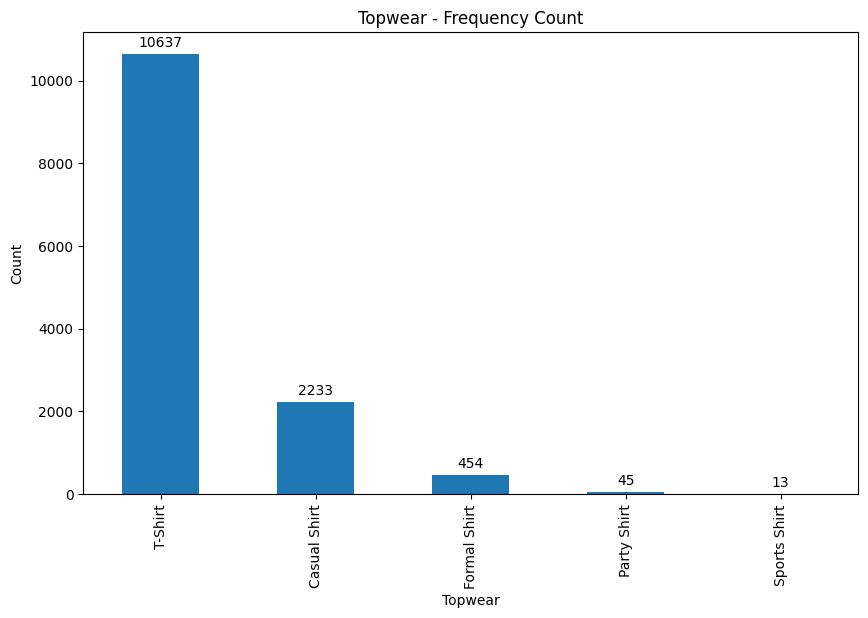

In [1413]:
# Select rows where the 'sub_category' is 'Topwear' and count the occurrences of each 'type'
plot_topwear = (df[df['sub_category'] == 'Topwear']['type'].value_counts(normalize=False))
plot_topwear = plot_topwear.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_topwear.patches:
    # Add text annotation for each bar
    plot_topwear.annotate(format(bar.get_height(), '.0f'),  # Format the count as an integer
                              (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the annotation at the center of each bar
                              ha='center', va='center',  # Horizontal and vertical alignment of the annotation
                              size=10, xytext=(0, 8),  # Size and offset of the annotation text
                              textcoords='offset points')  # Offset coordinate system for annotation

plt.ylim(0,)
plt.xlabel('Topwear')
plt.ylabel('Count')
plt.title('Topwear - Frequency Count')
plt.show()

##### **Bottomwear**                   

In [1414]:
# Filter the DataFrame based on multiple conditions 
df[(df['sub_category'] == 'Bottomwear') &
                    (~df['title'].str.contains('Track Pants')) &
                    (~df['title'].str.contains('Sports Shorts')) &
                    (~df['title'].str.contains('Bermuda')) &
                    (~df['title'].str.contains('Trousers'))&
                    (~df['title'].str.contains('Shorts')) &
                    (~df['title'].str.contains('Men Cargos'))&
                    (~df['title'].str.contains('Jeans'))&
                    (~df['title'].str.contains('Tights'))&
                    (~df['title'].str.contains('Harem Pants')) &
                    (df['title'].str.contains('Three Fourths'))].sample()


,actual_price,average_rating,brand,category,discount,seller,selling_price,sub_category,title,color,material,type
13925,"3,699.00",4.60,Sherr,Clothing and Accessories,60.00,Sherrys,"1,443.00",Bottomwear,Solid Men Denim Three Fourths,light blue,denim,NaN


In [1415]:
for index, row in df.iterrows():
    if 'Track Pants' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Track Pants'
    elif 'Trousers' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Trousers' 
    elif 'Men Cargos' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Men Cargos'
    elif 'Jeans' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Jeans'
    elif 'Tights' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Tights'
    elif 'Harem Pants' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Harem Pants'
    elif 'Sports Shorts' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Sports Shorts'
    elif 'Bermuda' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Bermuda'
    elif 'Shorts' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Shorts'
    elif 'Three Fourths' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Three Fourths'
    

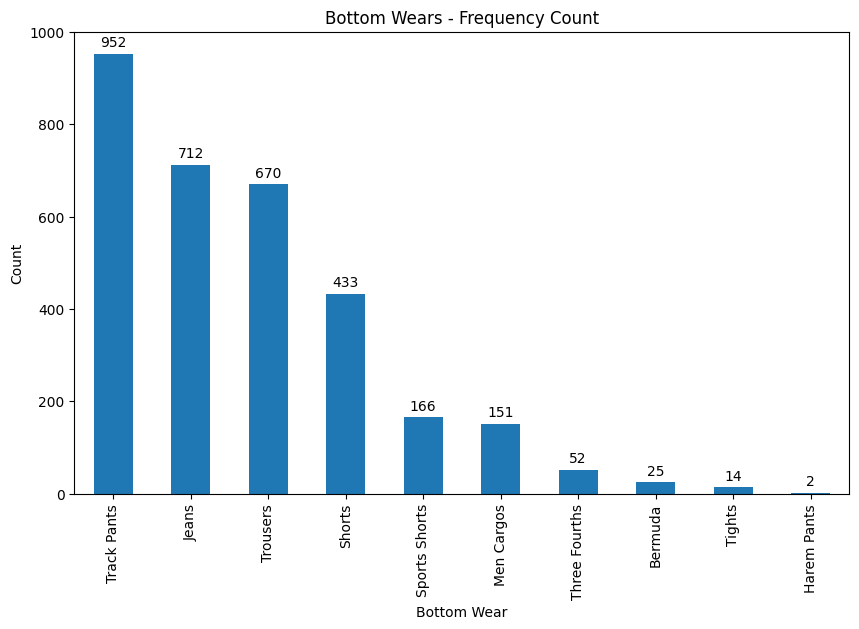

In [1416]:
# Select rows where the 'sub_category' is 'Bottomwear' and count the occurrences of each 'type'
plot_bottomwear = (df[df['sub_category'] == 'Bottomwear']['type'].value_counts(normalize=False))
plot_bottomwear = plot_bottomwear.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_bottomwear.patches:
    # Add text annotation for each bar
    plot_bottomwear.annotate(format(bar.get_height(), '.0f'),  # Format the count as an integer
                              (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the annotation at the center of each bar
                              ha='center', va='center',  # Horizontal and vertical alignment of the annotation
                              size=10, xytext=(0, 8),  # Size and offset of the annotation text
                              textcoords='offset points')  # Offset coordinate system for annotation

plt.ylim(0,1000)
plt.xlabel('Bottom Wear')
plt.ylabel('Count')
plt.title('Bottom Wears - Frequency Count')
plt.show()

##### **Winter Wear**      

In [1417]:
# Filter the DataFrame based on multiple conditions
df[(df['sub_category'] == 'Winter Wear')&
                  (~df['title'].str.contains('Sweater')) &
                  (~df['title'].str.contains('Jacket')) &
                  (~df['title'].str.contains('Sweatshirt')) &
                  (~df['title'].str.contains('Gloves')) &
                  (~df['title'].str.contains('Shrug')) &
                  (df['title'].str.contains('Cardigan'))].sample()


,actual_price,average_rating,brand,category,discount,seller,selling_price,sub_category,title,color,material,type
1951,"2,395.00",3.80,AXMA,Clothing and Accessories,30.00,ModaElementi,"1,676.00",Winter Wear,Men Button Solid Cardigan,blue,pure cotton,NaN


In [1418]:
for index, row in df.iterrows():
    if 'Sweater' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Sweater'
    elif 'Jacket' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Jacket'
    elif 'Sweatshirt' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Sweatshirt'
    elif 'Gloves' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Gloves'
    elif 'Shrug' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Shrug'
    elif 'Cardigan' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Cardigan'
    

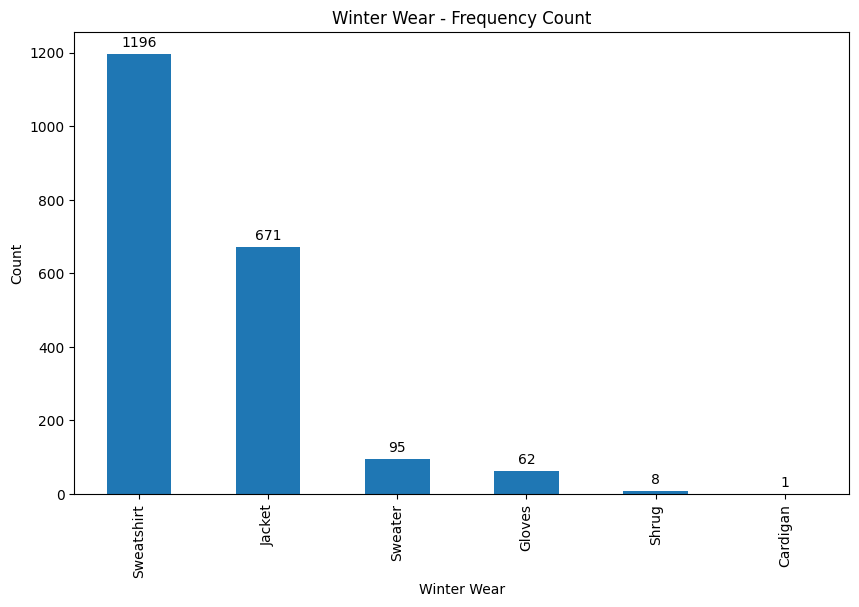

In [1419]:
# Select rows where the 'sub_category' is 'Winter Wear' and count the occurrences of each 'type'
plot_winter = (df[df['sub_category'] == 'Winter Wear']['type'].value_counts(normalize=False))
plot_winter = plot_winter.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_winter.patches:
    # Add text annotation for each bar
    plot_winter.annotate(format(bar.get_height(), '.0f'),  # Format the count as an integer
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the annotation at the center of each bar
                         ha='center', va='center',  # Horizontal and vertical alignment of the annotation
                         size=10, xytext=(0, 8),  # Size and offset of the annotation text
                         textcoords='offset points')  # Offset coordinate system for annotation

plt.ylim(0,)
plt.xlabel('Winter Wear')
plt.ylabel('Count')
plt.title('Winter Wear - Frequency Count')
plt.show()


##### **Clothing Accessories**

In [1420]:
# Filter the DataFrame based on multiple conditions
df[(df['sub_category'] == 'Clothing Accessories')&
                  (~df['title'].str.contains('Ankle Length')) &
                  (~df['title'].str.contains('Calf Length')) &
                  (~df['title'].str.contains('Mid-Calf')) &
                  (~df['title'].str.contains('Knee High')) &
                  (~df['title'].str.contains('Cap')) &
                  (~df['title'].str.contains('Dupatta')) &
                  (~df['title'].str.contains('Low Cut')) &
                  (~df['title'].str.contains('Peds/Footie')) &
                  (df['title'].str.contains('Bandana'))].sample()



,actual_price,average_rating,brand,category,discount,seller,selling_price,sub_category,title,color,material,type
21165,399.00,3.30,Boan Boan,Clothing and Accessories,62.00,Caandy Trading Company,149.00,Clothing Accessories,"Men & Women, Men, Boys, Women, Girls, Boys & G...",Black,viscose blend,NaN


In [1421]:
df = df.drop(index=[20493,20498,21116],axis=0).reset_index(drop=True)

In [1422]:
for index, row in df.iterrows():
    if 'Ankle Length' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Ankle Length'
    elif 'Calf Length' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Calf Length'
    elif 'Mid-Calf' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Mid-Calf'
    elif 'Knee High' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Knee High'
    elif 'Cap' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Cap'
    elif 'Dupatta' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Dupatta'
    elif 'Low Cut' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Low Cut'
    elif 'Peds/Footie' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Peds/Footie'
    elif 'Bandana' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Bandana'

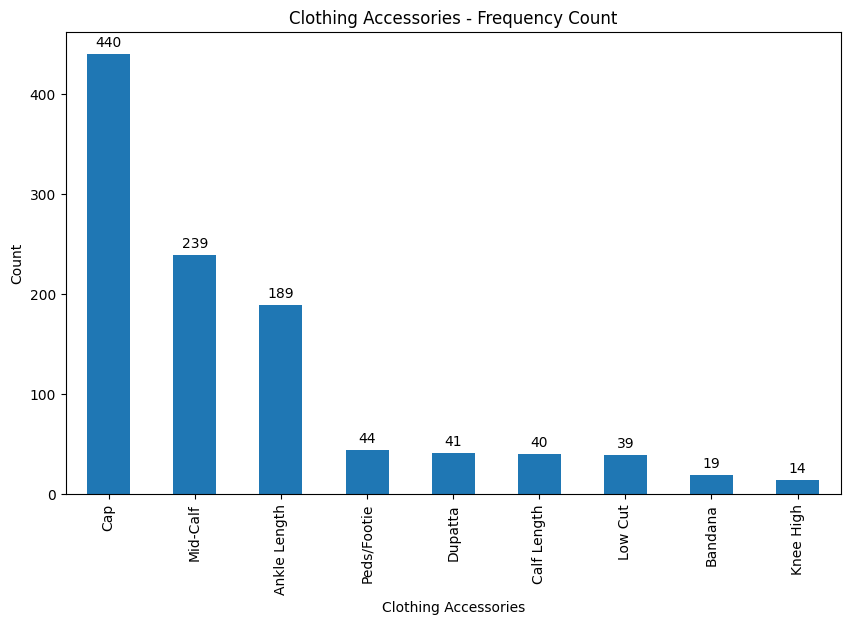

In [1423]:
# Select rows where the 'sub_category' is 'Clothing Accessories' and count the occurrences of each 'type'
plot_accessories = (df[df['sub_category'] == 'Clothing Accessories']['type'].value_counts(normalize=False))
plot_accessories = plot_accessories.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_accessories.patches:
    # Add text annotation for each bar
    plot_accessories.annotate(format(bar.get_height(), '.0f'),  # Format the count as an integer
                               (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the annotation at the center of each bar
                               ha='center', va='center',  # Horizontal and vertical alignment of the annotation
                               size=10, xytext=(0, 8),  # Size and offset of the annotation text
                               textcoords='offset points')  # Offset coordinate system for annotation

plt.ylim(0,)
plt.xlabel('Clothing Accessories')
plt.ylabel('Count')
plt.title('Clothing Accessories - Frequency Count')
plt.show()

##### **Innerwear and Swimwear**        

In [1424]:
# Filter the DataFrame based on multiple conditions
df[(df['sub_category'] == 'Innerwear and Swimwear')&
   (~df['title'].str.contains('Boxer'))&
   (~df['title'].str.contains('Brief'))&
   (~df['title'].str.contains('Trunks'))]['title']
 

Series([], Name: title, dtype: object)

In [1425]:
for index, row in df.iterrows():
    if 'Boxer' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Boxer'
    elif 'Brief' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Brief'
    elif 'Trunks' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Trunks'

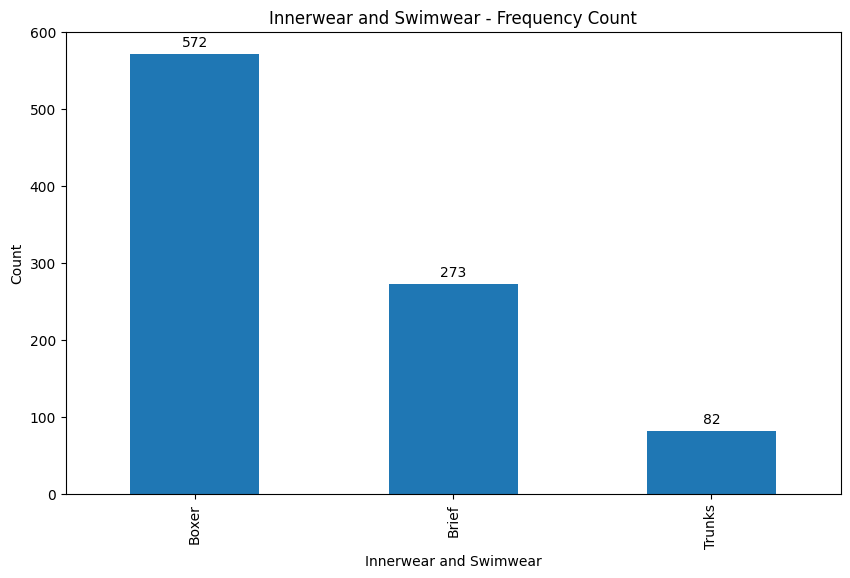

In [1426]:
# Select rows where the 'sub_category' is 'Innerwear and Swimwear' and count the occurrences of each 'type'
plot_inner = (df[df['sub_category'] == 'Innerwear and Swimwear']['type'].value_counts(normalize=False))
plot_inner = plot_inner.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_inner.patches:
    # Add text annotation for each bar
    plot_inner.annotate(format(bar.get_height(), '.0f'),  # Format the count as an integer
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the annotation at the center of each bar
                        ha='center', va='center',  # Horizontal and vertical alignment of the annotation
                        size=10, xytext=(0, 8),  # Size and offset of the annotation text
                        textcoords='offset points')  # Offset coordinate system for annotation

plt.ylim(0,)
plt.xlabel('Innerwear and Swimwear')
plt.ylabel('Count')
plt.title('Innerwear and Swimwear - Frequency Count')
plt.show()


##### **Men's Footwear**               

In [1427]:
df[(df['sub_category'] == 'Men\'s Footwear')&
   (~df['title'].str.contains('Slides'))&
   (~df['title'].str.contains('Shoes'))&
   (~df['title'].str.contains('Sandal'))&
   (~df['title'].str.contains('Loafers'))&
   (~df['title'].str.contains('Sneakers'))&
   (~df['title'].str.contains('Boots'))&
   (~df['title'].str.contains('Lace Up'))&
   (~df['title'].str.contains('Casuals'))&
   (~df['title'].str.contains('Party'))&
   (~df['title'].str.contains('Slip'))&
   (~df['title'].str.contains('COURT SHOE'))&
   (~df['title'].str.contains('Jutis'))]['title']

3531     For Men  (Grey)
3537      For Men  (Red)
3538    For Men  (Black)
3547    For Men  (Black)
3565    For Men  (Black)
Name: title, dtype: object

In [1428]:
df = df.drop(index=[3531,3537,3538,3547,3565],axis=0).reset_index(drop=True)

In [1429]:
for index, row in df.iterrows():
    if 'Slides' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Slides'
    elif 'Shoes' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Shoes'
    elif 'Sandal' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Sandal'
    elif 'Loafers' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Loafers'
    elif 'Sneakers' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Sneakers'
    elif 'Boots' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Boots'
    elif 'Lace Up' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Lace Up'
    elif 'Casuals' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Casuals Shoes'
    elif 'Party' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Casuals Shoes '
    elif 'Slip' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Slip'
    elif 'COURT SHOE' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Shoes'
    elif 'Jutis' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Jutis'
    

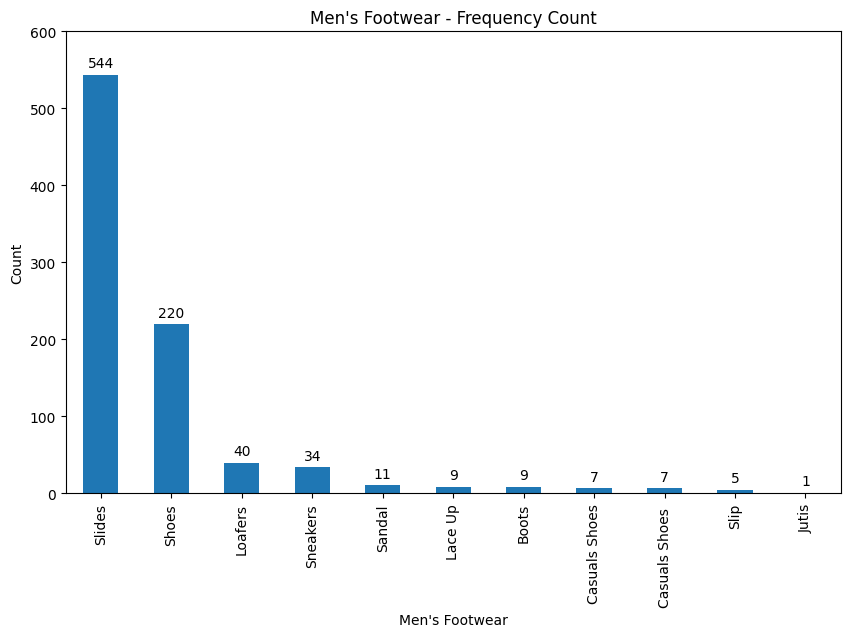

In [1430]:
# Select rows where the 'sub_category' is 'Men's Footwear' and count the occurrences of each 'type'
plot_footwear = (df[df['sub_category'] == "Men's Footwear"]['type'].value_counts(normalize=False))
plot_footwear = plot_footwear.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_footwear.patches:
    # Add text annotation for each bar
    plot_footwear.annotate(format(bar.get_height(), '.0f'),  # Format the count as an integer
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the annotation at the center of each bar
                        ha='center', va='center',  # Horizontal and vertical alignment of the annotation
                        size=10, xytext=(0, 8),  # Size and offset of the annotation text
                        textcoords='offset points')  # Offset coordinate system for annotation
plt.ylim(0,600)
plt.xlabel("Men's Footwear")
plt.ylabel('Count')
plt.title("Men's Footwear - Frequency Count")
plt.show()


##### **Kurtas, Ethnic Sets and Bottoms**    

In [1431]:
df[(df['sub_category'] == 'Kurtas, Ethnic Sets and Bottoms')&
   (~df['title'].str.contains('Kurta and Pyjama Set'))&
   (~df['title'].str.contains('Pathani Suit Set'))&
   (~df['title'].str.contains('Straight Kurta'))&
   (~df['title'].str.contains('Kurta and Churidar Set'))&
   (~df['title'].str.contains('Pathani Kurta'))&
   (~df['title'].str.contains('Pakistani Kurta'))&
   (~df['title'].str.contains('Ethnic Dress'))&
   (~df['title'].str.contains('Ethnic Jacket and Pyjama Set'))&
   (~df['title'].str.contains('Ethnic Jacket and Kurta Set'))&
   (~df['title'].str.contains('A-line Kurta'))&
   (~df['title'].str.contains('Asymmetric Kurta'))&
   (~df['title'].str.contains('Trail Cut Kurta'))&
   (~df['title'].str.contains('High Low Kurta'))&
   (~df['title'].str.contains('Pyjama'))]['title']

Series([], Name: title, dtype: object)

In [1432]:
index =  df[(df['sub_category'] == 'Kurtas, Ethnic Sets and Bottoms')&
                        (df['title'].str.contains('Kurta and Pyjama Set')) |
                        (df['title'].str.contains('Pathani Suit Set')) |
                        (df['title'].str.contains('Straight Kurta')) |
                        (df['title'].str.contains('Kurta and Churidar Set')) |
                        (df['title'].str.contains('Pathani Kurta')) |
                        (df['title'].str.contains('Pakistani Kurta')) |
                        (df['title'].str.contains('Ethnic Dress')) |
                        (df['title'].str.contains('Ethnic Jacket and Pyjama Set')) |
                        (df['title'].str.contains('Ethnic Jacket and Kurta Set')) |
                        (df['title'].str.contains('A-line Kurta')) |
                        (df['title'].str.contains('Asymmetric Kurta')) |
                        (df['title'].str.contains('Trail Cut Kurta')) |
                        (df['title'].str.contains('High Low Kurta')) |
                        (df['title'].str.contains('Pyjama'))].index.tolist()
len(index)

677

In [1433]:
for index, row in df.iterrows():
    if 'Kurta' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Kurta'
    elif 'Pyjama' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Pyjama'
    elif 'Ethnic Dress' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Ethnic Dress'
    elif 'Pathani Suit' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Ethnic Dress'
    

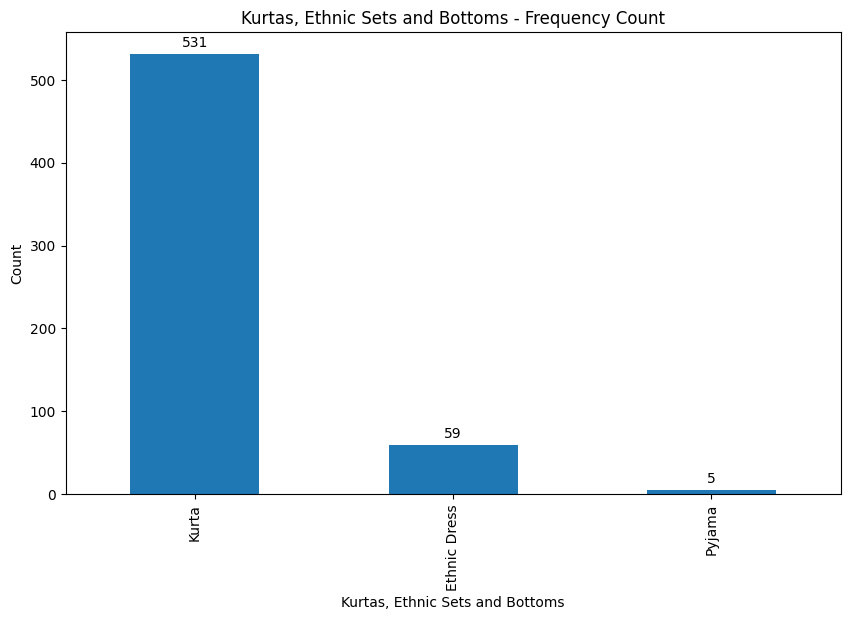

In [1434]:
plot_ethnic = (df[(df['sub_category'] == 'Kurtas, Ethnic Sets and Bottoms')]['type'].value_counts(dropna=False))
plot_ethnic = plot_ethnic.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_ethnic.patches:
       plot_ethnic.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')
plt.ylim(0,)
plt.xlabel('Kurtas, Ethnic Sets and Bottoms')
plt.ylabel('Count')
plt.title('Kurtas, Ethnic Sets and Bottoms - Frequency Count')
plt.show()

##### **Fabrics**                  

In [1435]:
df[(df['sub_category'] == 'Fabrics')&
   (~df['title'].str.contains('Cotton Polyester'))&
   (~df['title'].str.contains('Rayon'))&
   (~df['title'].str.contains('Cotton Printed Shirt Fabric'))&
   (~df['title'].str.contains('Synthetic'))&
   (~df['title'].str.contains('Leather'))&
   (~df['title'].str.contains('Suit'))&
   (~df['title'].str.contains('Polycotton'))&
   (~df['title'].str.contains('Trouser Fabric'))]['title']

5839          Cotton Printed Kurta Fabric  (Unstitched)
21296         Cotton Striped Shirt Fabric  (Unstitched)
21327     Cotton Polka Print Shirt Fabric  (Unstitched)
21381    Cotton Floral Print Shirt Fabric  (Unstitched)
21473    Cotton Floral Print Shirt Fabric  (Unstitched)
Name: title, dtype: object

In [1436]:
for index, row in df.iterrows():
    if 'Cotton Polyester' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Cotton Polyester Fabric'
    elif 'Rayon' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Rayon Fabric'
    elif 'Cotton' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Cotton Fabric'
    elif 'Trouser Fabric' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Trouser Fabric'
    elif 'Synthetic' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Synthetic Fabric'
    elif 'Leather' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Leather Fabric'
    elif 'Polycotton' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Polycotton Fabric'
    elif 'Suit' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Suit Fabric'

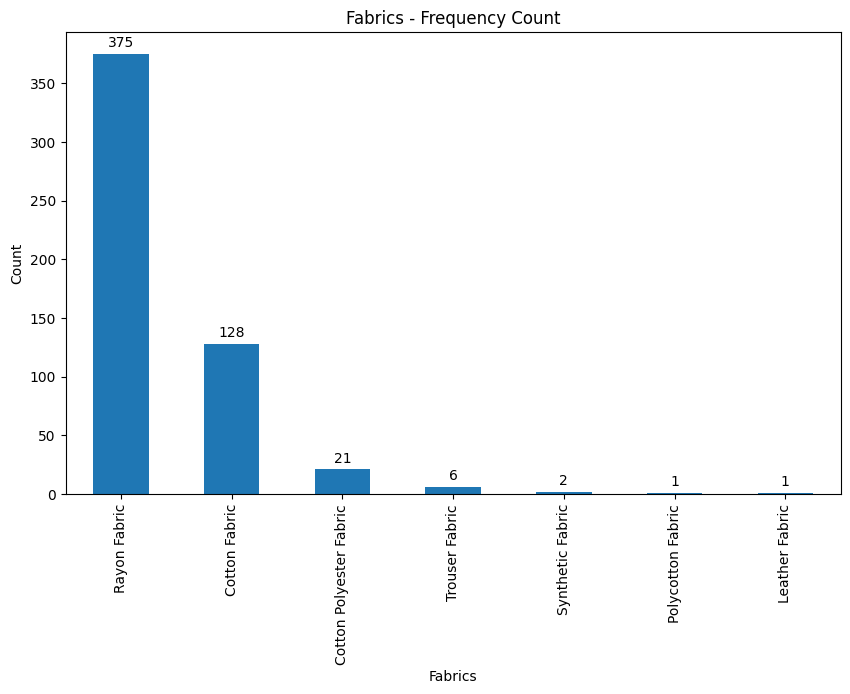

In [1437]:
plot_fabric = (df[(df['sub_category'] == 'Fabrics')]['type'].value_counts())
plot_fabric = plot_fabric.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_fabric.patches:
       plot_fabric.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')
plt.ylim(0,)
plt.xlabel('Fabrics')
plt.ylabel('Count')
plt.title('Fabrics - Frequency Count')
plt.show()

##### **Blazers, Waistcoats and Suits**       

In [1438]:
df[(df['sub_category'] == 'Blazers, Waistcoats and Suits')&
   (~df['title'].str.contains('Waistcoat'))&
   (~df['title'].str.contains('Blazer'))&
   (~df['title'].str.contains('Suit'))&
   (~df['title'].str.contains('Blend Coat'))]['title']

Series([], Name: title, dtype: object)

In [1439]:
for index, row in df.iterrows():
    if 'Waistcoat' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Waistcoat'
    elif 'Blazer' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Blazer'
    elif 'Blend Coat' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Blend Coat'
    elif 'Piece Solid Men Suit' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Suit'

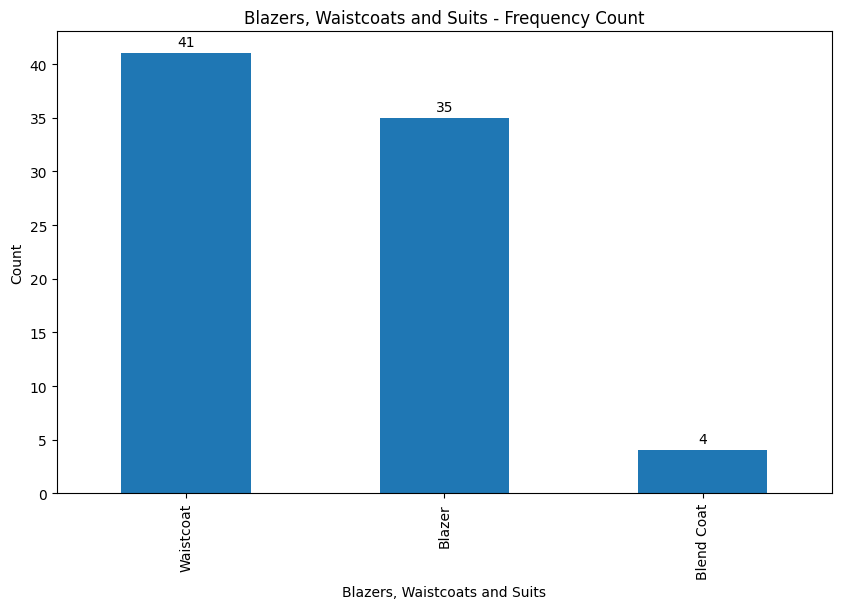

In [1440]:
plot_blazers = (df[(df['sub_category'] == 'Blazers, Waistcoats and Suits')]['type'].value_counts(dropna=False))
plot_blazers = plot_blazers.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_blazers.patches:
       plot_blazers.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')

plt.ylim(0,)
plt.xlabel('Blazers, Waistcoats and Suits')
plt.ylabel('Count')
plt.title('Blazers, Waistcoats and Suits - Frequency Count')
plt.show()

##### **Sleepwear**  

In [1441]:
df[(df['sub_category'] == 'Sleepwear')&
   (~df['title'].str.contains('Pyjama'))
   ]['title']

Series([], Name: title, dtype: object)

In [1442]:
for index, row in df.iterrows():
    if 'Pyjama' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Pyjama'

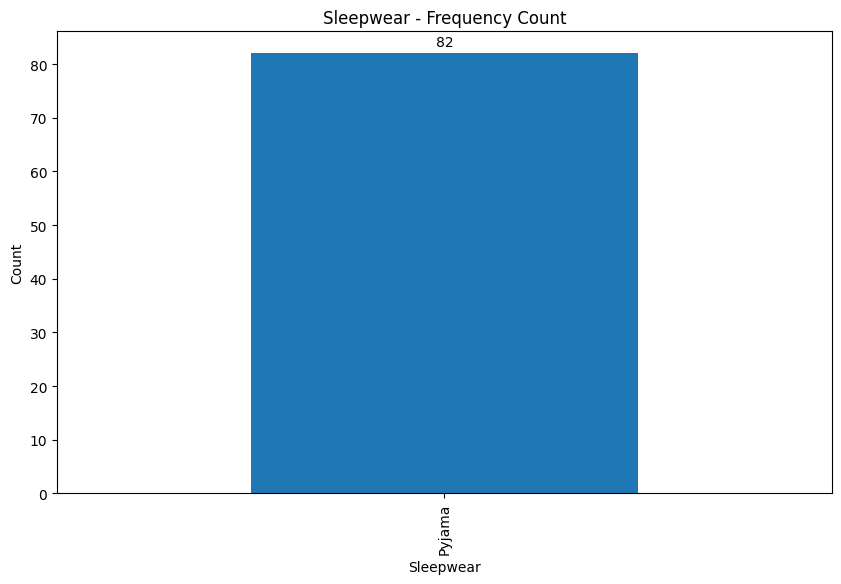

In [1443]:
plot_sleepwear = (df[(df['sub_category'] == 'Sleepwear')]['type'].value_counts(dropna=False))
plot_sleepwear = plot_sleepwear.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_sleepwear.patches:
       plot_sleepwear.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')
plt.ylim(0,)
plt.xlabel('Sleepwear')
plt.ylabel('Count')
plt.title('Sleepwear - Frequency Count')
plt.show()

##### **Raincoats**

In [1444]:
df[(df['sub_category'] == 'Raincoats')&
   (~df['title'].str.contains('Raincoat'))
   ]['title']

Series([], Name: title, dtype: object)

In [1445]:
for index, row in df.iterrows():
    if 'Raincoat' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Raincoats'

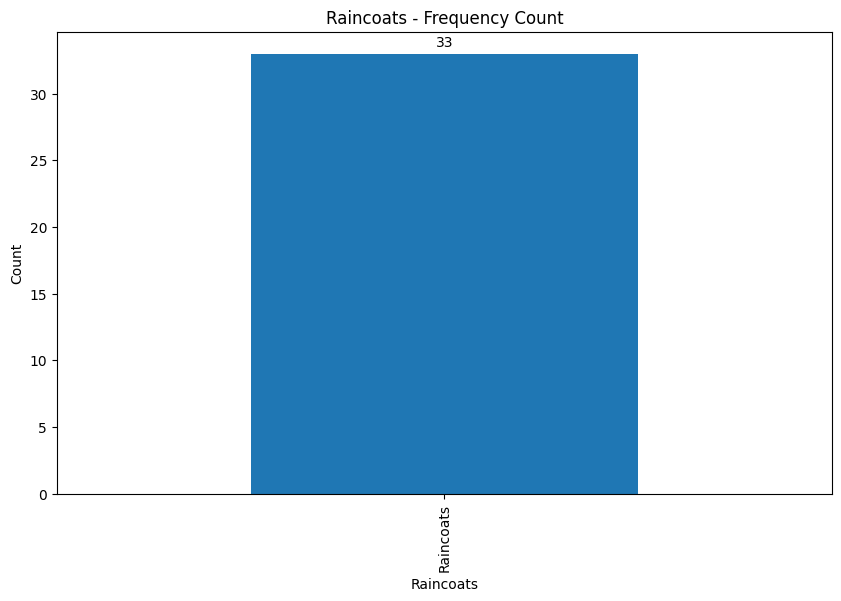

In [1446]:
plot_raincoat = (df[(df['sub_category'] == 'Raincoats')]['type'].value_counts())
plot_raincoat = plot_raincoat.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_raincoat.patches:
       plot_raincoat.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')
       
plt.ylim(0,)
plt.xlabel('Raincoats')
plt.ylabel('Count')
plt.title('Raincoats - Frequency Count')
plt.show()

##### **Tracksuits**

In [1447]:
df[(df['sub_category'] == 'Tracksuits')&
   (~df['title'].str.contains('Track Suit'))
   ]['title']

Series([], Name: title, dtype: object)

In [1448]:
for index, row in df.iterrows():
    if 'Track Suit' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Track Suit'

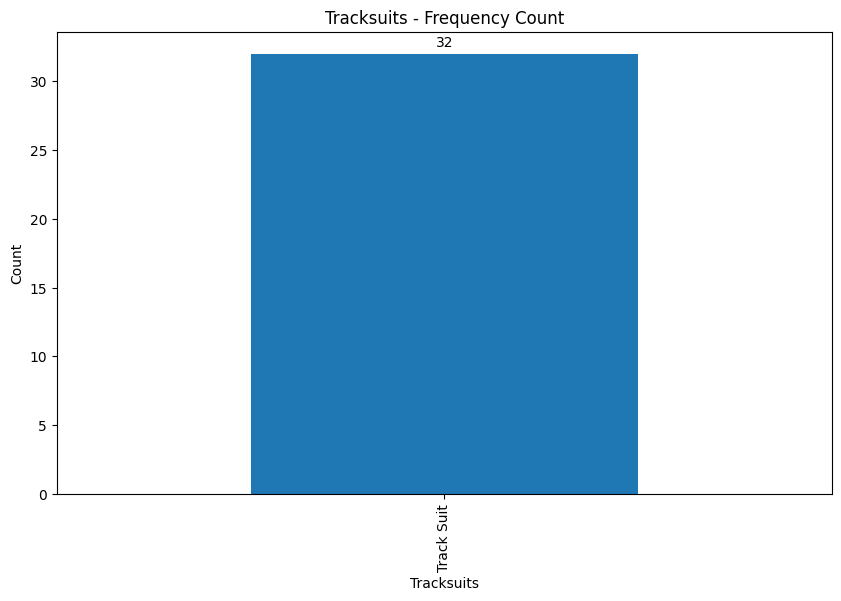

In [1449]:
plot_track = (df[(df['sub_category'] == 'Tracksuits')]['type'].value_counts(dropna=False))
plot_track = plot_track.plot(kind='bar', figsize=(10, 6))

# Annotate the bars in the count plot with their respective counts
for bar in plot_track.patches:
       plot_track.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')
plt.ylim(0,)
plt.xlabel('Tracksuits')
plt.ylabel('Count')
plt.title('Tracksuits - Frequency Count')
plt.show()

##### **Clothing and Accessories**

In [1450]:
df[(df['sub_category'] == 'Clothing and Accessories') &
   (df['title'].str.endswith('Trousers'))]['title']

5588    Slim Fit Men Brown, Black, Grey Cotton Viscose...
5589               Slim Fit Men Brown Polycotton Trousers
5593               Slim Fit Men Beige Polycotton Trousers
5596                Slim Fit Men Grey Polycotton Trousers
5599    Pack Of 3 Slim Fit Men Blue, Brown, Black Cott...
5608                Slim Fit Men Blue Polycotton Trousers
5614          Slim Fit Men Multicolor Polycotton Trousers
5615          Slim Fit Men Multicolor Polycotton Trousers
5618               Slim Fit Men White Polycotton Trousers
5619     Slim Fit Men Black Cotton Viscose Blend Trousers
5620     Slim Fit Men Brown Cotton Viscose Blend Trousers
5623             Slim Fit Men Brown Cotton Blend Trousers
5625     Slim Fit Men Black Cotton Viscose Blend Trousers
5628                Slim Fit Men Grey Polycotton Trousers
5630             Slim Fit Men Brown Cotton Blend Trousers
5631          Slim Fit Men Multicolor Polycotton Trousers
5632     Slim Fit Men Brown Cotton Viscose Blend Trousers
5635          

In [1451]:
df[(df['sub_category'] == 'Clothing and Accessories')&
   (df['title'].str.contains('Trousers'))
   ]['title']

5588    Slim Fit Men Brown, Black, Grey Cotton Viscose...
5589               Slim Fit Men Brown Polycotton Trousers
5593               Slim Fit Men Beige Polycotton Trousers
5596                Slim Fit Men Grey Polycotton Trousers
5599    Pack Of 3 Slim Fit Men Blue, Brown, Black Cott...
5608                Slim Fit Men Blue Polycotton Trousers
5614          Slim Fit Men Multicolor Polycotton Trousers
5615          Slim Fit Men Multicolor Polycotton Trousers
5618               Slim Fit Men White Polycotton Trousers
5619     Slim Fit Men Black Cotton Viscose Blend Trousers
5620     Slim Fit Men Brown Cotton Viscose Blend Trousers
5623             Slim Fit Men Brown Cotton Blend Trousers
5625     Slim Fit Men Black Cotton Viscose Blend Trousers
5628                Slim Fit Men Grey Polycotton Trousers
5630             Slim Fit Men Brown Cotton Blend Trousers
5631          Slim Fit Men Multicolor Polycotton Trousers
5632     Slim Fit Men Brown Cotton Viscose Blend Trousers
5635          

In [1452]:
for index, row in df.iterrows():
    if 'Trousers' in df.loc[index, 'title']:
        df.loc[index, 'type'] = 'Trousers'

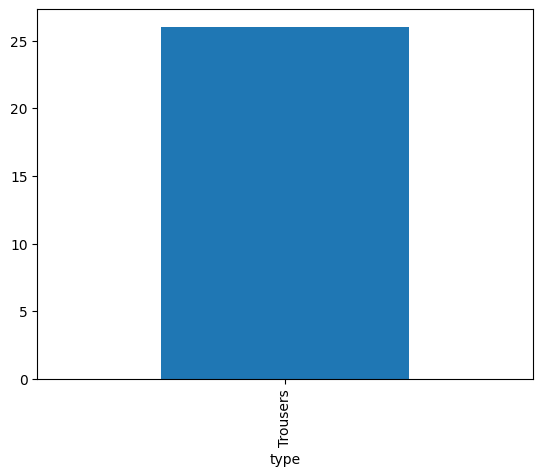

In [1453]:
(df[(df['sub_category'] == 'Clothing and Accessories')]['type'].value_counts(dropna=False)).plot(kind='bar')
plt.show()

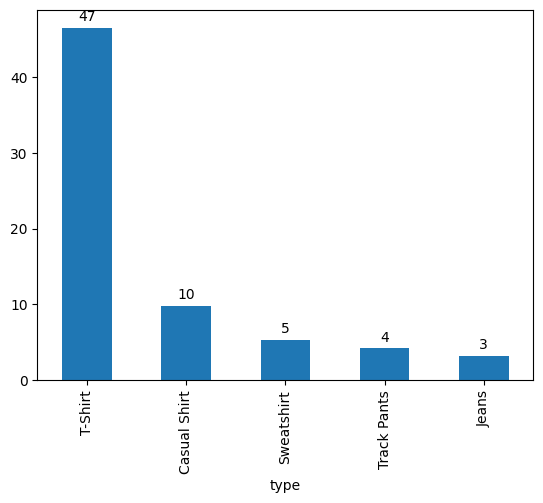

In [1454]:
count_type = (df['type'].value_counts(normalize=True)*100).nlargest(5).plot(kind='bar')

# Annotate the bars in the count plot with their respective counts
for bar in count_type.patches:
       count_type.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')
plt.show()

## **Exploratory Data Analysis (EDA)**

### **Popular product categories and brands**

#### **Frequency of Brands in Subcategory**

In [1455]:
(df.groupby('sub_category')['brand']).nunique().sort_values(ascending=False)

sub_category
Topwear                            138
Bottomwear                         102
Winter Wear                         73
Clothing Accessories                63
Innerwear and Swimwear              31
Kurtas, Ethnic Sets and Bottoms     21
Tracksuits                          12
Raincoats                            9
Sleepwear                            7
Blazers, Waistcoats and Suits        5
Fabrics                              4
Men's Footwear                       3
Clothing and Accessories             1
Name: brand, dtype: int64

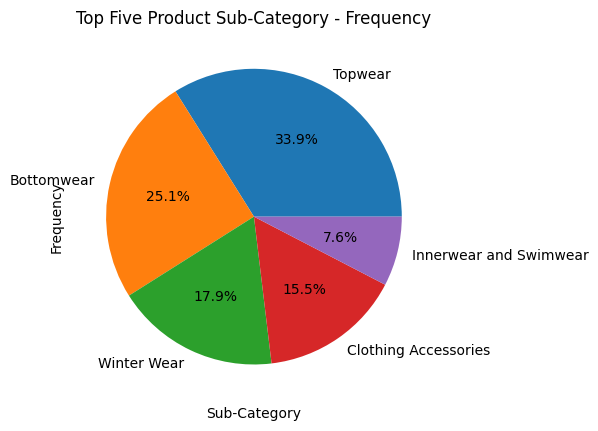

In [1456]:
df.groupby('sub_category')['brand'].nunique().nlargest(5).plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')
plt.title('Top Five Product Sub-Category - Frequency')
plt.show()

#### **Frequency of Product type - Top Five**

col_0         count
type               
T-Shirt       10636
Casual Shirt   2233
Sweatshirt     1196
Track Pants     951
Jeans           711


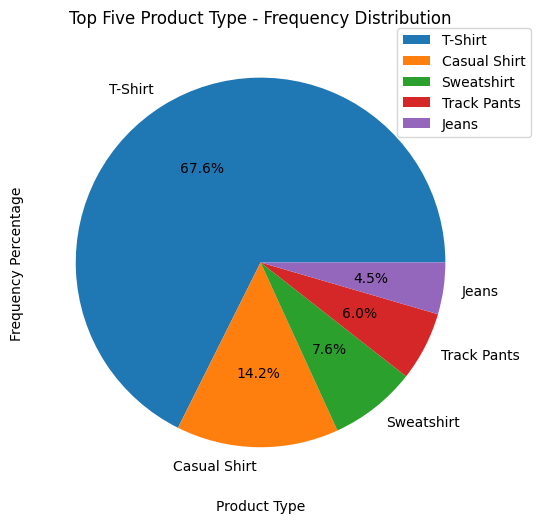

In [1457]:
top_type = pd.crosstab(index=df['type'], 
            columns='count').sort_values(by='count').nlargest(columns='count', 
                                                              n=5)
print(top_type)
top_type.plot(kind='pie', y='count',autopct='%1.1f%%', figsize=(6, 6))

# Align the label box
plt.legend(bbox_to_anchor=(1.1, .89), loc="center right")

plt.xlabel('Product Type')
plt.ylabel('Frequency Percentage')
plt.title('Top Five Product Type - Frequency Distribution')
plt.show()

#### **Frequency of Brands in Top Five Product type**

type
T-Shirt         110
Track Pants      54
Casual Shirt     49
Sweatshirt       47
Jacket           38
Name: brand, dtype: int64


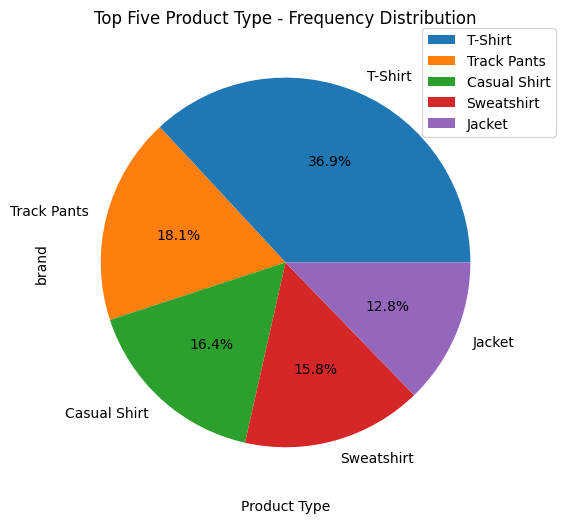

In [1458]:
top_type_brand = (df.groupby('type')['brand']).nunique().sort_values(ascending=False).nlargest(5)
print(top_type_brand)

top_type_brand.plot(kind='pie', y='count',autopct='%1.1f%%', figsize=(6, 6))

# Align the label box
plt.legend(bbox_to_anchor=(1.1, .89), loc="center right")

plt.xlabel('Product Type')
#plt.ylabel('Frequency Percentage')
plt.title('Top Five Product Type - Frequency Distribution')
plt.show()

#### **Frequency of T-Shirt Brands with High Customer Ratings**

brand
ARBO                16.69
PixF                 8.77
REEB                 8.07
Marca Disa           7.17
Pu                   6.47
TOM BU               2.99
M7 By Metrona        2.90
Scott Internation    2.51
CupidSto             2.27
ATTIITU              2.21
Name: proportion, dtype: float64


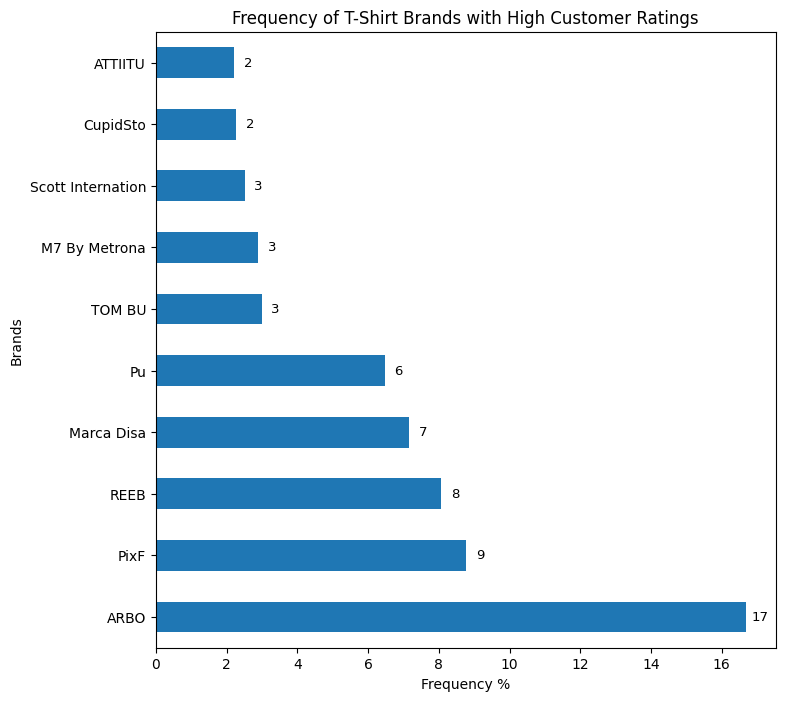

In [1459]:
plot_brand = (df[(df['type'] == 'T-Shirt') &
             (df['average_rating'] >= 4)]['brand'].value_counts(dropna=False, 
                                                                normalize=True)*100).nlargest(10)

print(plot_brand)

plots_brands = plot_brand.plot(kind='barh', figsize=(8, 8))

# Annotating the bars
for bar in plots_brands.patches:
    plots_brands.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(), bar.get_y() + bar.get_height()/ 2),
                   ha='center', va='center',
                   size=9.5, xytext=(10, 0), textcoords='offset points')
    
plt.title('Frequency of T-Shirt Brands with High Customer Ratings')
plt.xlabel('Frequency %')
plt.ylabel('Brands')
plt.show()

#### **Frequency of T-Shirt colors - Top 10**

color
Black        16.66
Multicolor   14.99
White        13.48
red           6.08
blue          5.47
grey          5.03
yellow        3.83
dark blue     2.59
navy          2.21
green         2.10
Name: proportion, dtype: float64


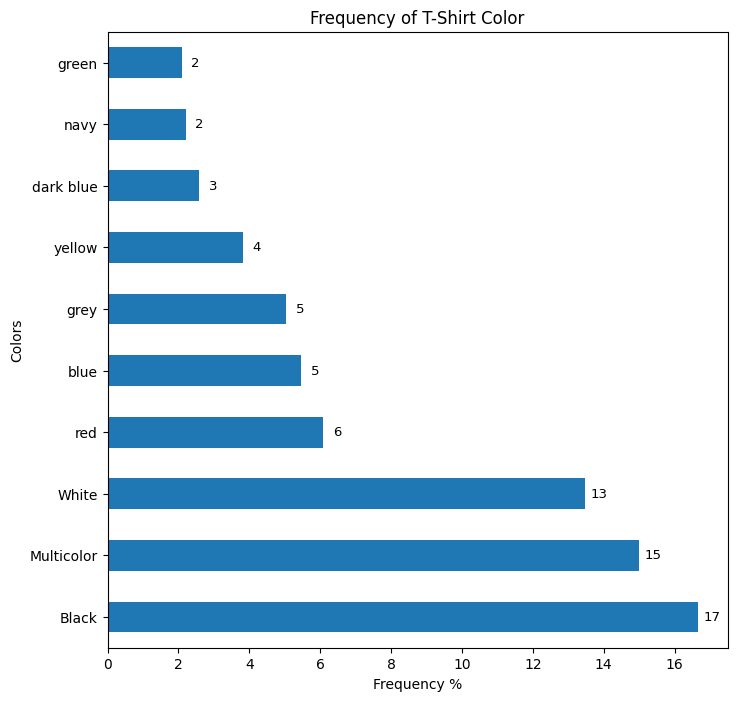

In [1460]:
plot_color_10 = (df[df['type'] == 'T-Shirt']['color'].value_counts(dropna=False, normalize=True)*100).nlargest(10)

print(plot_color_10)

plots_10 = plot_color_10.plot(kind='barh', figsize=(8, 8))

# Annotating the bars
for bar in plots_10.patches:
    plots_10.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(), bar.get_y() + bar.get_height()/ 2),
                   ha='center', va='center',
                   size=9.5, xytext=(10, 0), textcoords='offset points')
    
plt.title('Frequency of T-Shirt Color')
plt.xlabel('Frequency %')
plt.ylabel('Colors')
plt.show()

#### **Frequency of T-Shirt Color with High Customer Ratings**

                proportion
color                     
Black                20.80
White                10.73
red                   6.35
Multicolor            5.44
blue                  4.48
grey                  4.38
dark blue             3.18
yellow                2.78
navy                  2.48
mustard yellow        2.24


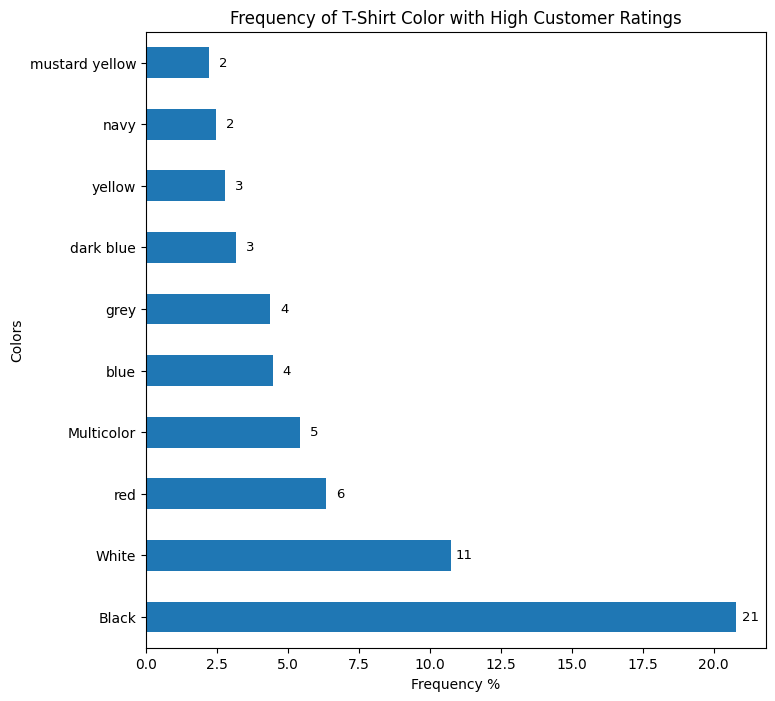

In [1461]:
plot_color = (df[(df['type'] == 'T-Shirt') &
             (df['average_rating'] >= 4)]['color'].value_counts(dropna=False, 
                                                                normalize=True)*100).nlargest(10)
print(pd.DataFrame(plot_color))
#print(plot_color)

plots = plot_color.plot(kind='barh', figsize=(8, 8))

# Annotating the bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(), bar.get_y() + bar.get_height()/ 2),
                   ha='center', va='center',
                   size=9.5, xytext=(10, 0), textcoords='offset points')
    
plt.title('Frequency of T-Shirt Color with High Customer Ratings')
plt.xlabel('Frequency %')
plt.ylabel('Colors')
plt.show()

#### **Top Brands and Seller with highest ratings**

In [1462]:
top_brands_by_subcategory = (df.groupby(['sub_category', 'brand', 'type', 'seller'])['average_rating']).mean()

# Sort the values based on average rating in descending order
top_brands_by_subcategory = top_brands_by_subcategory.groupby('sub_category', group_keys=False).apply(lambda x: x.sort_values(ascending=False))

top_brands_by_subcategory.sort_values(ascending=False).reset_index(drop=True)

top_brands_by_subcategory = top_brands_by_subcategory.groupby('sub_category').head(5)

#print(top_brands_by_subcategory)

pd.DataFrame(top_brands_by_subcategory)

average_rating
sub_category                    brand                   type                    seller                                                            
Blazers, Waistcoats and Suits   Zack Fo                 Waistcoat               KrishnamEnterprisaes                                          4.49
                                True Bl                 Blazer                  KAPSONSRETAILPVTLTD                                           3.67
                                Solid Styl              Blazer                  Fashion Company                                               3.50
                                ABC ANY BUDY CLE        Blazer                  ABCGARMENTS                                                   3.40
                                                                                SumaiyaEnterprises                                            3.40
Bottomwear                      SayItLo                 Shorts                  sayitloud                                                     5.00
                                Szto                    Track Pants             SHREYASHFASHIONS                                              5.00
                                TOM BU                  Men Cargos              TOMBURG                                                       4.60
                                REEB                    Tights                  RetailNet                                                     4.57
                                Breakboun               Jeans                   RetailNet                                                     4.50
Clothing Accessories            Cots                    Ankle Length            EVINCEMARKETERS                                               4.70
                                                        Calf Length             EVINCEMARKETERS                                               4.70
                                                        Low Cut                 EVINCEMARKETERS                                               4.70
                                Modest Ci               Cap                     Alamos                                                        4.50
                                Cots                    Mid-Calf                EVINCEMARKETERS                                               4.47
Clothing and Accessories        INSPI                   Trousers                InspireFashions                                               3.50
Fabrics                         vims rai                Cotton Fabric           MAHIR ENETERPRISE                                             3.60
                                                        Rayon Fabric            MAHIR ENETERPRISE                                             3.60
                                Royalty Retail And Expo Cotton Polyester Fabric RoyaltyRetailAndExport                                        3.30
                                AMZKA                   Synthetic Fabric        Backspace Enterprise                                          3.25
                                vims rai                Cotton Fabric           WHITE SKY                                                     3.20
Innerwear and Swimwear          V                       Trunks                  BungExclusive(Not Enough Ratin                                5.00
                                                        Brief                   THeBeSTs                                                      4.60
                                COL                     Brief                   SkipperInd                                                    4.55
                                V                       Trunks                  ROCKYMOUNT                                                    4.40
                                                                                Janvi e-commerce2.7Seller changed. Check for an...            4.30
Kurtas, Ethnic S

### **Analyzing pricing trends and discount strategies**

In [1463]:
df.columns

Index(['actual_price', 'average_rating', 'brand', 'category', 'discount',
       'seller', 'selling_price', 'sub_category', 'title', 'color', 'material',
       'type'],
      dtype='object')

In [1464]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
actual_price,"22,850.00","1,463.74",899.75,179.00,899.00,"1,299.00","1,799.00","12,999.00"
average_rating,"22,850.00",3.61,0.67,1.00,3.20,3.70,4.00,5.00
discount,"22,850.00",50.94,16.36,1.00,40.00,53.00,63.00,87.00
selling_price,"22,850.00",687.56,487.26,99.00,397.00,546.50,811.00,"7,799.00"


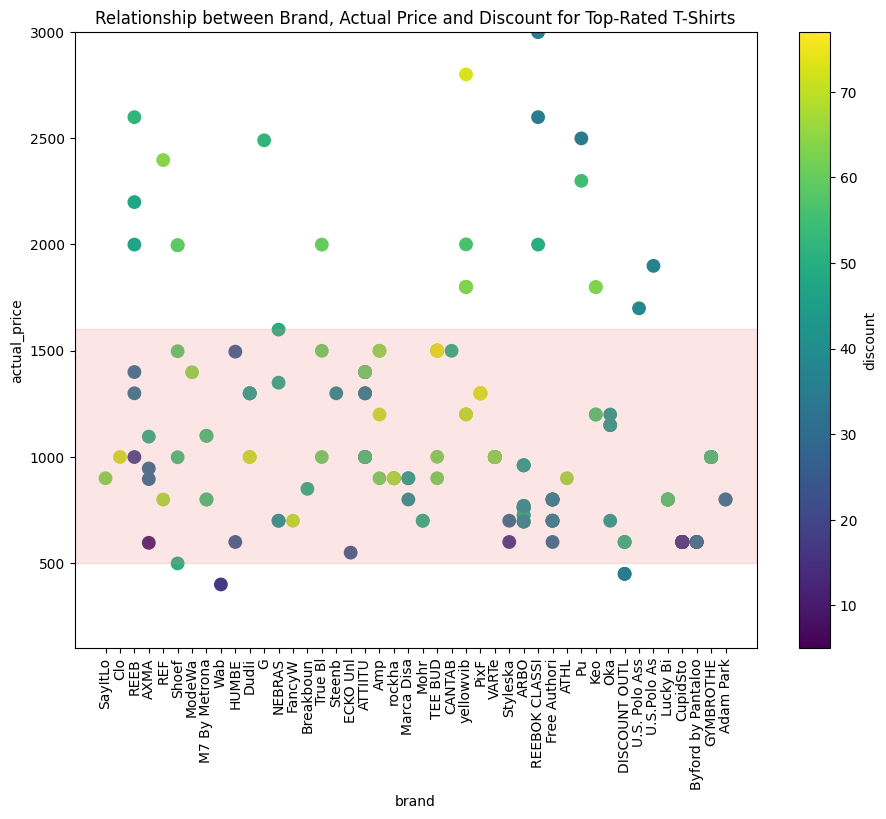

In [1471]:
relation_brand = (df[(df['type'] == 'T-Shirt') & 
                    (df['average_rating'] >= 4 )].nlargest(n=200, columns='average_rating'))
relation_brand.plot(kind='scatter', x='brand', y='actual_price', c= 'discount',
                    figsize=(11, 8), s= 80)

plt.axhspan(ymin=500, ymax=1600, color='lightcoral', alpha=0.2)
plt.ylim(100,3000)
plt.xticks(rotation=90)

plt.title("Relationship between Brand, Actual Price and Discount for Top-Rated T-Shirts")

plt.show()

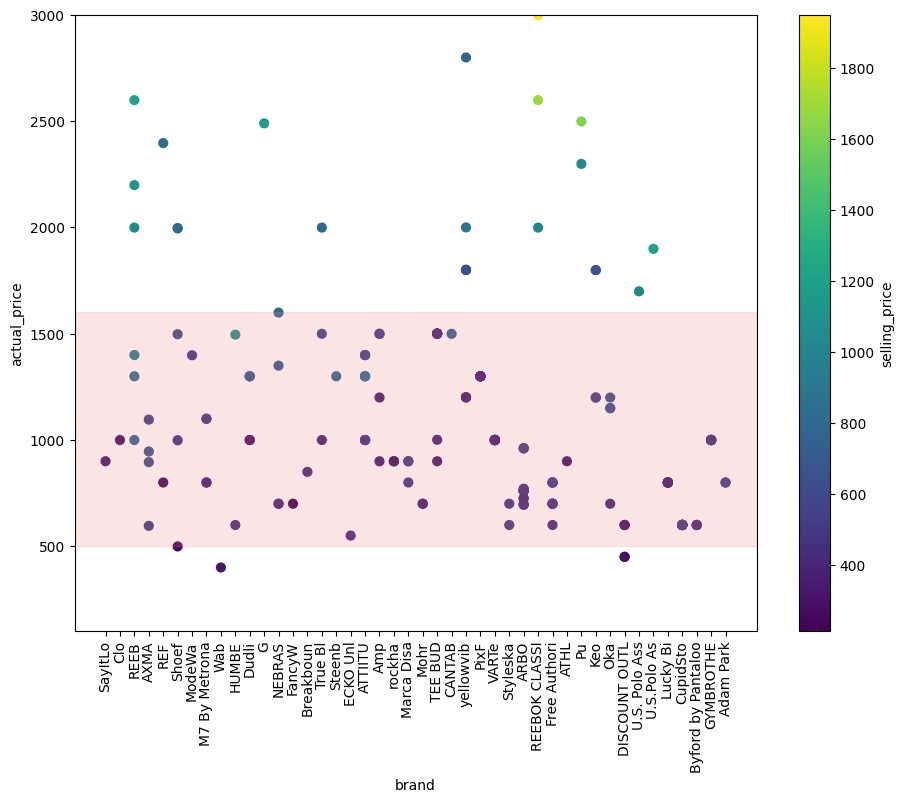

In [1466]:
(df[(df['type'] == 'T-Shirt') & 
    (df['average_rating'] >= 4 )].nlargest(n=200, columns='average_rating')).plot(kind='scatter', 
                                                                                  x='brand', y='actual_price', c= 'selling_price',
                                                                                   figsize=(11, 8), s= 40)
# Draw horizontal line at y-axis 1500 with red color
#plt.axhline(y=1500, color='red', linestyle='--')

plt.axhspan(ymin=500, ymax=1600, color='lightcoral', alpha=0.2)
plt.ylim(100,3000)
plt.xticks(rotation=90)
plt.show()

### **Understanding seller behavior and performance**

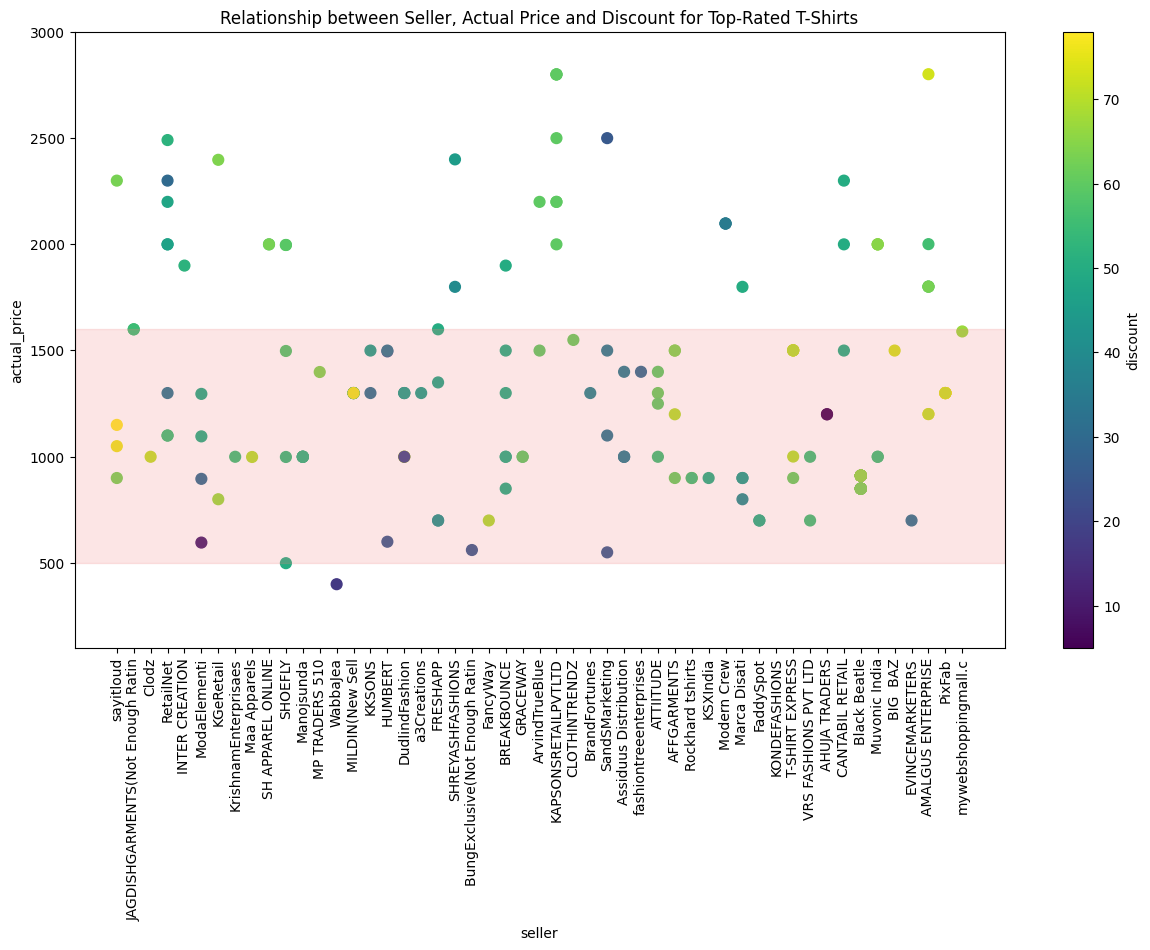

In [1467]:
seller_relation = (df[(df['average_rating'] >= 1 )].nlargest(n=200, columns='average_rating'))
seller_relation.plot(kind='scatter', x='seller', y='actual_price', c= 'discount',
                    figsize=(15, 8), s= 60)

plt.title("Relationship between Seller, Actual Price and Discount for Top-Rated T-Shirts")
plt.axhspan(ymin=500, ymax=1600, color='lightcoral', alpha=0.2)
plt.ylim(100,3000)
plt.xticks(rotation=90)
plt.show()

### **Investigating customer preferences and product satisfaction**

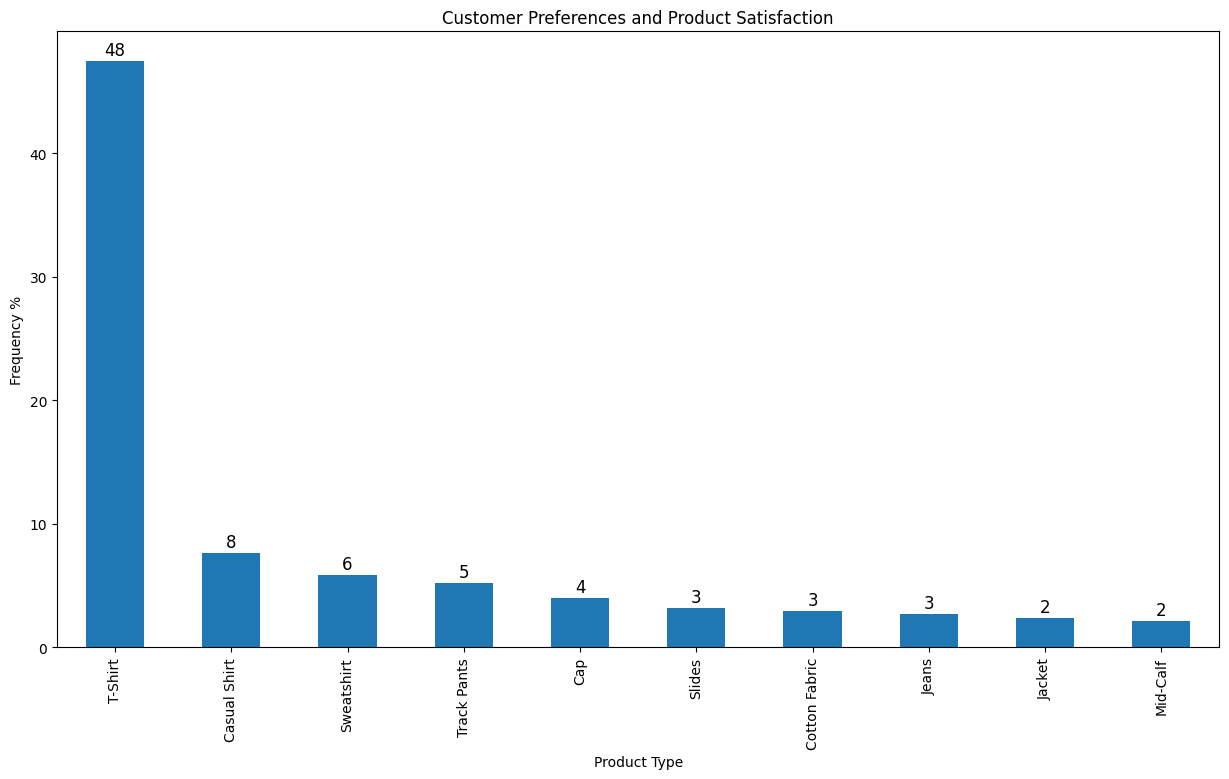

In [1468]:
plot_cust_sat = (df[df['average_rating'] >=4]['type'].value_counts(normalize=True)*100).nlargest(10)
plot_cust_sat = plot_cust_sat.plot(kind='bar', figsize=(15, 8))
               
# Annotate the bars in the count plot with their respective counts
for bar in plot_cust_sat.patches:
       plot_cust_sat.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=12, xytext=(0, 8),
                      textcoords='offset points')
plt.ylim(0,)
plt.xlabel('Product Type')
plt.ylabel('Frequency %')
plt.title('Customer Preferences and Product Satisfaction')
plt.show()


### **Exploring correlations among various attributes such as price, rating, and brand**

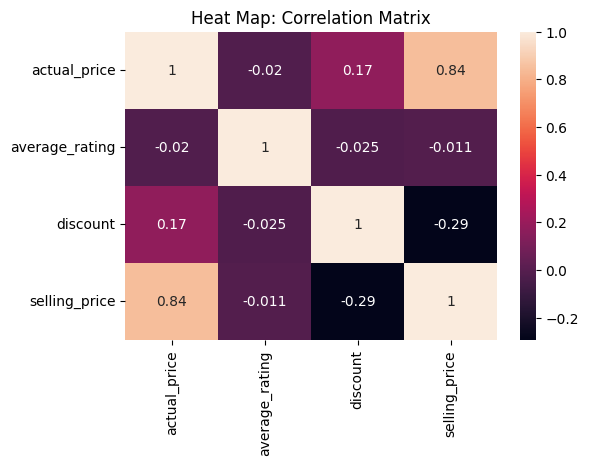

In [1469]:
# Calculate the correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Plotting correlation heat map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)

plt.title('Heat Map: Correlation Matrix')

plt.show()

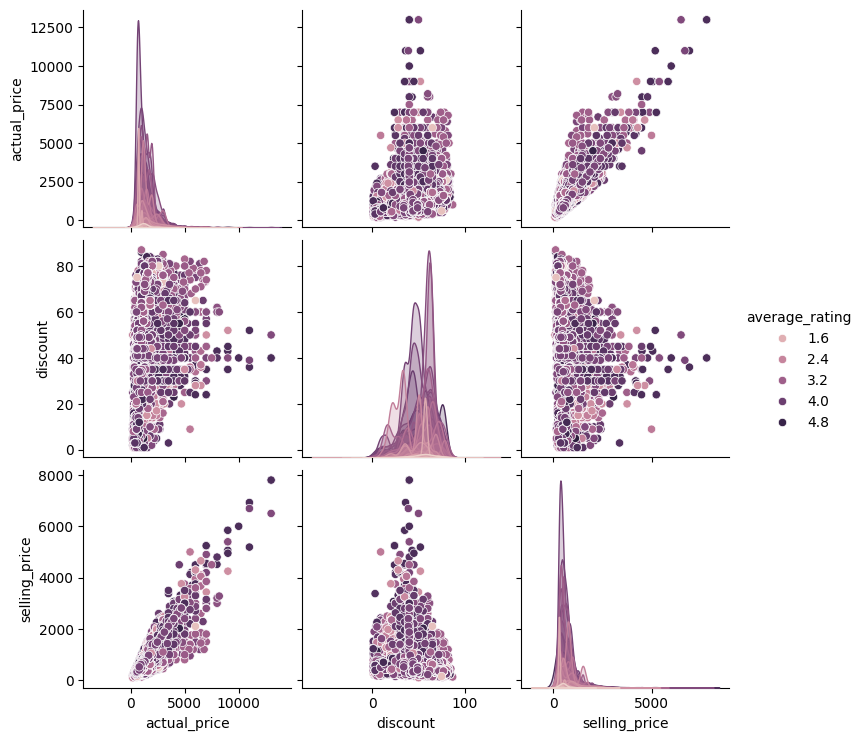

In [1470]:
# Pair Plot
sns.pairplot(df, hue='average_rating')
plt.show()